## Desafio 3 - Clasificador de Hongos

**Grupo 2:**

Faro, Gonzalo

Cabrol, Angelica

Vinyolas, Mariana

Hutler, Ianina

# [Índice](#Índice)

- [Objetivos](#Objetivos)
- [Descripción del Dataset](#Descripción-del-dDataset)
- [Importación de librerías](#Importación-de-librerías)
- [Seteos Generales](#Seteos-Generales)
- [Análisis exploratorio de los datos](#Análisis-exploratorio-de-los-datos)
- [Feature Engineer](#Feature-Engineer)
- [PCA](#PCA)
- [Análisis utilizando Naive Bayes](#Análisis-utilizando-Naive-Bayes)
- [Feature Selection con SelectKBest](#Feature-Selection-con-SelectKBest)
- [Análisis utilizando KNN: Vecinos más cercanos](#Análisis-utilizando-KNN:-Vecinos-más-cercanos)
- [Regresión Logística](#Regresión-Logística)
- [Árboles de decisión](#Árboles-de-decisión)
- [Curvas ROC y área bajo la curva (AUC): Comparamos Modelos](#Curvas-ROC-y-área-bajo-la-curva-(AUC):-Comparamos-Modelos)
- [Prueba de Regresión Logística sin aplicar los métodos de Feature Selection (KBest y RFECV)](#Prueba-de-Regresión-Logística-sin-aplicar-los-métodos-de-Feature-Selection-(KBest-y-RFECV))
- [KNN sin aplicar KBest](#KNN-sin-aplicar-KBest)
- [Conclusión final](#Conclusión-final)

# [Objetivos](#Objetivos)
[Volver](#Índice)

En este desafío se pondrán en práctica habilidades importantes como la construcción de un clasificador binario (o multiclase) usando uno o varios algoritmos de clasificación. 

Muchos hongos tienen una importancia especial para los seres humanos, especialmente en la alimentación y la medicina. Algunos son comestibles y su consumo es sumamente popular en la gastronomía de ciertas regiones; quizá los champiñones son los hongos y setas más consumidos. Sin embargo, su aportación a la medicina es más relevante, ya que gracias a un hongo se elabora la penicilina, un antibiótico usado en el tratamiento de infecciones que ha salvado millones de vidas desde su descubrimiento en 1928.

# [Descripción del Dataset](#Descripción-del-Dataset)
[Volver](#Índice)

Este dataset incluye descripciones de ejemplares hipoteticos de 23 especies de hongos agaricales. Son los hongos en sombrero, que tienen laminillas abajo, y los que la gente más se confunde en cuanto a toxicidad o comestibilidad. 
Estos hongos se encuentran en el libro: The Audubon Society Field Guide to North American Mushrooms (1981). Cada especie es identificada como edible (comestible) o poisonous (venenoso) o dudoso y, por lo tanto, no recomendado. En este dataset, se combina este último con el venenoso. No hay una regla simple para determinar si el hongo es comestible o no.

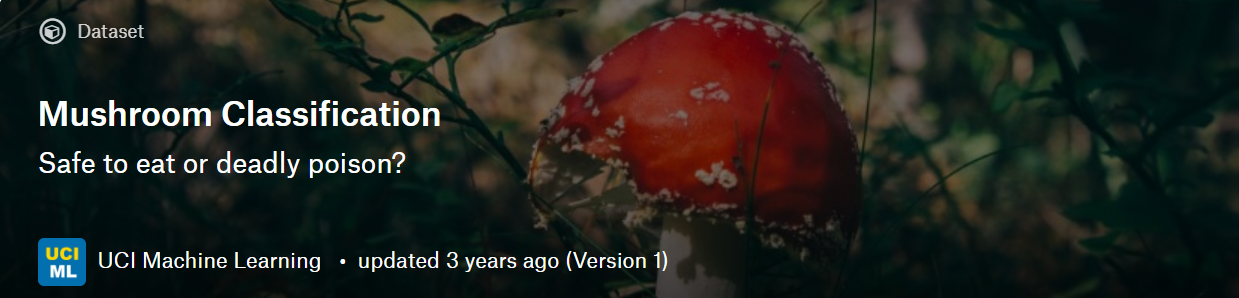

In [1]:
from IPython.display import Image 
Image(filename=('image.png'))

#### Attribute Information: (classes: edible=e, poisonous=p)
<em>Traducción</em>: Clases: e=comestibles, p= venenosas

#### cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
<em>Traducción</em>: Forma del sombrero: b=acampanada, c=conica, x=convexa, f=aplanada, k= semi-aplanada, s=hundida

#### cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
<em>Traducción</em>: Superficie del sombrero:f=fibroso, g=con surcos, y=con escamas, s=liso

#### cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
<em>Traducción</em>: color del sombrero: n=marron, b=beige, c=canela, g=gris, r=verde, p=rosa, u=violeta, e=rojo, w=blanco, y=amarillo

#### bruises: bruises=t,no=f
<em>Traducción</em>: magulladuras: t=Presentes, f=ausentes

#### odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
<em>Traducción</em>: olor: a=almendras, l=anis, c=madera quemada, y=pescado, f=fétido, m=humedad/rancio, n=ninguno, p=vinagre, s=picante

#### gill-attachment: attached=a,descending=d,free=f,notched=n
<em>Traducción</em>: Son las laminillas por debajo del sombrero del hongo.
Tipo: a: adherentes, d: descendientes, f:libres n: ondeado 

#### gill-spacing: close=c,crowded=w,distant=d
<em>Traducción</em>: el espacio entre cada una de ellas c=cercanas, w=amontonadas, d=distantes

#### gill-size: broad=b,narrow=n
<em>Traducción</em>: tamano de las laminillas b=anchas, n=estrechas

#### gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
<em>Traducción</em>: color de las laminillas. k=negro, n=marron, b= beige, h=chocolate, g=gris, r=verde, o=naranja, p=rosa, u=violeta, e=rojo, w=blanco, y=amarillo

#### stalk-shape: enlarging=e,tapering=t
<em>Traducción</em>: Tallo:e=agrandado, t=afinado

#### stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
<em>Traducción</em>:Raiz del Tallo:b=bulboso, c=un poco hinchado, u=con forma de copa, e=recto, r=con una raiz extensa, ?=ausente

#### stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
<em>Traducción</em>:tallo por encima del anillo. f=fibroso, y=escamoso, k=sedoso, s=liso

#### stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
<em>Traducción</em>: tallo por debajo del anillo. f=fibroso, y=escamoso, k=sedoso, s=liso

#### stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
<em>Traducción</em>: color del tallo por encima del anillo.  n=marron, b= beige, h=chocolate, o=naranja, u=violeta, w=blanco, y=amarillo  

#### stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
<em>Traducción</em>: tallo por debajo del anillo.

#### veil-type: partial=p,universal=u
<em>Traducción</em>: El velo o veil es una membrana que cubre el hongo, y puede hacerlo de forma p=parcial, o u=completa 

#### veil-color: brown=n,orange=o,white=w,yellow=y
<em>Traducción</em>: el velo puede tener diferentes colores. 'n': 'marron', 'o': 'naranja', 'w': 'blanco', 'y': 'amarillo'

#### ring-number: none=n,one=o,two=t
<em>Traducción</em>: n=no tiene, o=uno, t=dos

#### ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
<em>Traducción</em>: tipo de anillo. c=telaraña, e=evanecente, f=resplandeciente, L=grande, p=colgante, s=revestimiento, z=faja

#### spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
<em>Traducción</em>: color de las esporas k=negro, n=marron, b= beige, h=chocolate, o=naranja, u=violeta, w=blanco, y=amarillo

#### population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
<em>Traducción</em>: poblacion a=abundante, c=agrupado, s=disperso, v=varios, no uniforme, y=solitarios

#### habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d
<em>Traducción</em>: donde los podemos encontrar:
g=en el pasto, l=hojas, m=prados, p=caminos, u=sitios urbanos, w=desechos, d=troncos

***---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------***

# [Importación de librerías](#Importación-de-librerías)
[Volver](#Índice)

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, auc, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

# [Seteos Generales](#Seteos-Generales)
[Volver](#Índice)

In [3]:
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_colwidth", 200)

# [Abrimos el Dataset y observación general de los datos](#Abrimos-el-Dataset-y-observación-general)
[Volver](#Índice)

In [4]:
df = pd.read_csv('mushrooms.csv')
print("Observación de las primeras filas:")
df.head()

Observación de las primeras filas:


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [5]:
print("Descripción de los datos:")
display(df.shape)
display(df.info())
display(df.describe())

Descripción de los datos:


(8124, 23)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

None

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


El dataset contiene 8124 filas. Cada una representa un hongo. 
De las 23 columnas, la primera es la que identifica el hongo como comestible o venenoso. El resto de las 22 columnas son features categoricas que describen al hongo de alguna manera. Cada valor esta codificado con una letra, como describimos mas arriba. A continuación chequeamos que el dataset no contiene valores nulos.

# [Análisis exploratorio de los datos](#Análisis-exploratorio-de-los-datos)
[Volver](#Índice)

In [6]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
print("Observación de valores únicos de hongos:\n")
for col in df.columns.values:
    print(col, df[col].unique())

Observación de valores únicos de hongos:

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


**Vamos a redefinir los nombres de las columnas al español, para que las features sean más fáciles de entender.**

In [8]:
df = df.rename(columns={'class': 'clase', 'cap-shape': 'forma_sombrero', 
                        'cap-surface': 'superficie_sombrero', 
                        'cap-color': 'color_sombrero', 'bruises': 'magulladuras',
                        'odor': 'olor', 'gill-attachment': 'laminillas', 
                        'gill-spacing': 'espacio_laminillas',
                        'gill-size': 'tamaño_laminillas', 'gill-color': 'color_laminillas',
                        'stalk-shape': 'forma_tallo', 'stalk-root': 'raiz_tallo', 
                        'stalk-surface-above-ring': 'tallo_encima_anillo',
                        'stalk-surface-below-ring': 'tallo_debajo_anillo', 
                        'stalk-color-above-ring': 'color_tallo_encima_anillo',
                        'stalk-color-below-ring': 'color_tallo_debajo_anillo', 
                        'veil-type': 'tipo_velo', 'veil-color': 'color_velo',
                        'ring-number': 'numero_anillos',
                        'ring-type': 'tipo_anillo', 
                        'spore-print-color': 'color_esporas', 
                        'population': 'poblacion'})
df.head()

,clase,forma_sombrero,superficie_sombrero,color_sombrero,magulladuras,olor,laminillas,espacio_laminillas,tamaño_laminillas,color_laminillas,forma_tallo,raiz_tallo,tallo_encima_anillo,tallo_debajo_anillo,color_tallo_encima_anillo,color_tallo_debajo_anillo,tipo_velo,color_velo,numero_anillos,tipo_anillo,color_esporas,poblacion,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


Procedemos a borrar esta feature ya que solo tiene un solo valor

In [9]:
df = df.drop('tipo_velo', axis=1)
df.shape

(8124, 22)

**Grafico de correlación**

Cuando los datos son categóricos no es posible utilizar la correlación de Pearson ya que esta medida contempla el valor de la media de los datos.
En nuestro caso vamos a utilizar una medida de asociación entre 2 features categóricas que es una variación del Test del chi cuadrado y se conoce como Cramér´s V. La matriz que se obtiene es simetrica.

En vez de trabajar con un rango entre [-1, 1] el rango con el que trabaja va de [0, 1] donde 0 significa que no hay asociación entre las variables y 1 que hay completa asociación entre variables. Por lo tanto no existe correlación negativa ya que no se van a obtener valores negativos.


In [10]:
def cramers_corrected_stat(matriz_confusion):
    #####################################################################
    #####################################################################
    # Calculate Cramers V statistic for categorial-categorial association
    # Uses correction from Bergsma and Wicher                           #
    # Journal of the Korean Statistical Society 42 (2013): 323-328      #
    #####################################################################
    #####################################################################

    chi2 = ss.chi2_contingency(matriz_confusion)[0]
    n = matriz_confusion.sum().sum()
    phi2 = chi2/n
    r,k = matriz_confusion.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

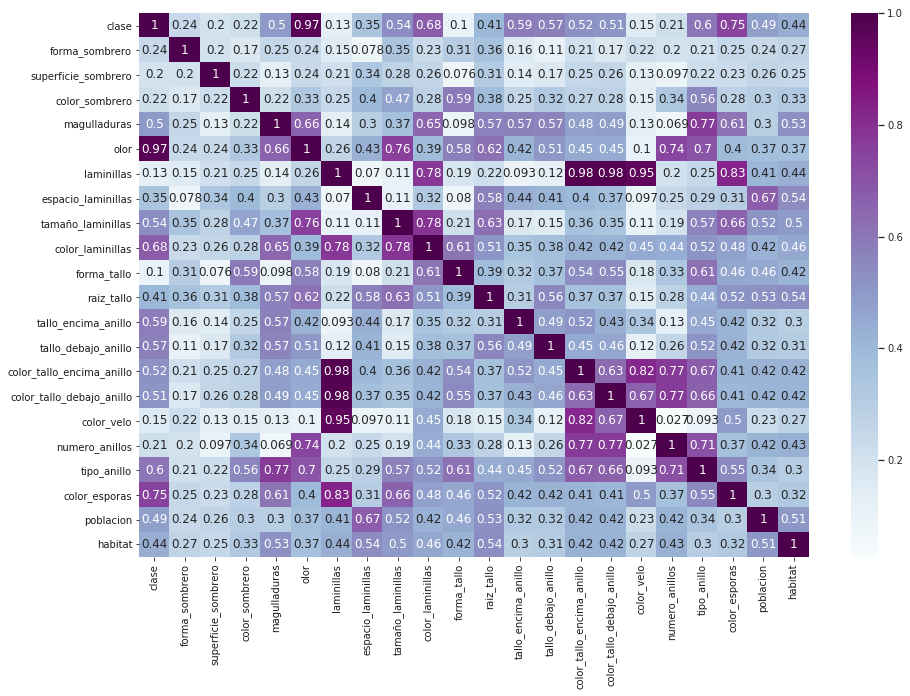

In [11]:
import scipy.stats as ss

columnas = df.columns
df_list = list()
for col in columnas:
    df_row = list()
    for col2 in columnas:
        matriz_confusion = pd.crosstab(df[ col ], df[ col2 ])
        df_row.append( cramers_corrected_stat( matriz_confusion ) )
    df_list.append(df_row )

df_corr = pd.DataFrame(df_list, columns=columnas)

df_corr.index = columnas

corr = df_corr

rc={'xtick.labelsize': 10, 'ytick.labelsize': 10}
plt.subplots(figsize=(15,10))
sns.set(rc=rc)
sns.heatmap(corr, annot=True, cmap='BuPu',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Del gráfico podemos observar que:
- La clase se relaciona fuertemente con el olor, color de esporas. Luego, en menos medida con el tallo encima y debajo del anillo, el color de las laminillas. Luego con el color del tallo encima y debajo del anillo y el tamaño de las laminillas. No se relaciona tanto con el sombrero, como muchas personas creen 
- El tipo de anillo se correlaciona fuertemente con el número de anillos, olor (como antes mencionamos) y con las magulladuras.
- El tipo de laminilla se correlaciona con el color del velo y con el color del tallo debajo y encima del anillo. Luego con el color de esporas, laminillas y magulladuras.
- El olor se asocia fuertemente a la clase, pero también al tipo de anillo, número de anillos, tamaño de laminillas y magulladuras.
- El color de esporas se asocia al tipo de laminillas.
- La forma y superficie del sombrero no se asocian fuertemente con ninguna otra feature.
- El color del sombrero se asocia solo con el tallo y tipo de anillo.

**A continuación queremos realizar gráficos de barras para visualizar la frecuencia de cada feature.**


Primero seteamos los nombres de las features

Como 'clase' va a ser la variable target o a predecir modificamos el valor de comestible == 0 y venenoso == 1

In [12]:
#clase
dic_clase= {'e': 'comestible', 'p': 'venenoso'}
df['clase'] = df['clase'].map(dic_clase)


In [13]:
#forma sombrero (cap-shape)
dic_forma_sombrero = {'b': 'acampanada', 'c': 'conica', 'x': 'convexa', 'f': 'aplanada',
                      'k': 'semi-aplanada', 's':'hundida'}
df['forma_sombrero'] = df['forma_sombrero'].map(dic_forma_sombrero)

#Superficie del sombrero (cap-surface)
dic_superf_sombrero = {'f':'fibroso', 'g':'con surcos', 'y':'con escamas', 's':'liso'}
df['superficie_sombrero'] = df['superficie_sombrero'].map(dic_superf_sombrero)

# color sombrero (cap-color)
dic_som_color= {'n': 'marron', 'b': 'beige', 'c':'canela', 'g':'gris', 'r':'verde', 'p':'rosa',
                'u':'violeta', 'e':'rojo', 'w':'blanco', 'y':'amarillo'}
df['color_sombrero'] = df['color_sombrero'].map(dic_som_color)

#magulladuras (bruises)
dic_mag= {'t': 'Presentes', 'f':'ausentes'}
df['magulladuras'] = df['magulladuras'].map(dic_mag)

# olor
dic_olor = {'a': 'almendras', 'l': 'anis', 'c': 'madera quemada', 'y': 'pescado',
      'f':'podrido', 'm': 'humedad/rancio', 'n':'ninguno', 'p':'vinagre', 's':'picante'}
df['olor'] = df['olor'].map(dic_olor)

#Tipo de laminillas (gill-attachment)
dic_tipo_lam= { 'a': 'adherentes', 'f':'libres'}
df['laminillas'] = df['laminillas'].map(dic_tipo_lam)

#espacio laminillas (gill-spacing)
dic_espacio_lam= { 'c': 'cercanas', 'w': 'amontonadas'}
df['espacio_laminillas'] = df['espacio_laminillas'].map(dic_espacio_lam)

#tamaño laminillas (gill-size)
dic_tamaño_lam= { 'b': 'anchas', 'n': 'estrechas'}
df['tamaño_laminillas'] = df['tamaño_laminillas'].map(dic_tamaño_lam)

#color laminillas (gill color)
dic_col_lam = {'k': 'negro', 'n': 'marron', 'b': 'beige', 'h': 'chocolate',
               'g': 'gris', 'r': 'verde', 'o': 'naranja', 'p': 'rosa', 
               'u': 'violeta', 'e': 'rojo', 'w': 'blanco', 'y': 'amarillo'}
df['color_laminillas'] = df['color_laminillas'].map(dic_col_lam)

#forma del tallo (stalk-shape)
dic_forma_tallo= { 'e': 'agrandado', 't': 'afinado'}
df['forma_tallo'] = df['forma_tallo'].map(dic_forma_tallo)

#raiz del tallo (stalk-root)
dic_raiz_tallo= { 'b':'bulboso', 'c':'un poco hinchado', 'e':'recto',
                 'r':'con una raiz extensa', '?': 'raiz ausente'}
df['raiz_tallo'] = df['raiz_tallo'].map(dic_raiz_tallo)

#tallo encima anillo (stalk-surface-above-ring): 
dic_tallo_enc= {'f':'fibroso', 'y':'escamoso', 'k':'sedoso', 's':'liso'}
df['tallo_encima_anillo'] = df['tallo_encima_anillo'].map(dic_tallo_enc)  


#tallo debajo anillo(stalk-surface-below-ring): 
dic_tallo_deb= {'f':'fibroso', 'y':'escamoso', 'k':'sedoso', 's':'liso'}
df['tallo_debajo_anillo'] = df['tallo_debajo_anillo'].map(dic_tallo_deb) 

#color tallo arriba del anillo (stalk-color-above-ring)
dic_color_tallo_encima_anillo= { 'n':'marron', 'b': 'beige', 'h': 'chocolate', 'o': 'naranja',
                                'u': 'violeta', 'w': 'blanco', 'y': 'amarillo', 'p': 'rosa',
                               'g': 'gris'}
df['color_tallo_encima_anillo'] = df['color_tallo_encima_anillo'].map(dic_color_tallo_encima_anillo)

#color tallo debajo del anillo (stalk-color-below-ring)
dic_color_tallo_debajo_anillo= { 'n':'marron', 'b': 'beige', 'h': 'chocolate', 'o': 'naranja',
                                'u': 'violeta', 'w': 'blanco', 'y': 'amarillo', 'p': 'rosa',
                               'g': 'gris'}
df['color_tallo_debajo_anillo'] = df['color_tallo_debajo_anillo'].map(dic_color_tallo_debajo_anillo)


#color velo (veil-color)
dic_color_velo= { 'n': 'marron', 'o': 'naranja', 'w': 'blanco', 'y': 'amarillo'}
df['color_velo'] = df['color_velo'].map(dic_color_velo)

# numero de anillos (ring-number)
dic_numero_anillos= {'n':'ausente', 'o':'uno', 't':'dos'}
df['numero_anillos'] = df['numero_anillos'].map(dic_numero_anillos) 

#tipo de anillo (ring-type)
dic_tipo_anillo= { 'e': 'evanecente', 'l': 'grande', 'f': 'resplandeciente',
                'p': 'colgante', 'n': 'ninguno'}
df['tipo_anillo'] = df['tipo_anillo'].map(dic_tipo_anillo)


# color esporas (spore-print-color)
dic_col_esp= {'k': 'negro', 'n': 'marron', 'b': 'beige', 'h': 'chocolate', 'r': 'verde', 'o': 'naranja', 
              'u': 'violeta','w': 'blanco', 'y': 'amarillo'}
df['color_esporas'] = df['color_esporas'].map(dic_col_esp)


# poblacion (population)'s' 'n' 'a' 'v' 'y' 'c'
dic_pop= {'a': 'abundante', 'c': 'agrupado', 's': 'disperso', 'v': 'varios',
          'n': 'numerosos', 'y': 'solitarios'}
df['poblacion'] = df['poblacion'].map(dic_pop)

#Habitat
dic_hab= {'g': 'pasto', 'l':'hojas', 'm':'prados', 'p':'caminos', 'u':'sitios urbanos', 'w':'desechos', 'd':'troncos'}
df['habitat'] = df['habitat'].map(dic_hab)


Realizamos unos gráficos para observar la frecuencia

comestible    4208
venenoso      3916
Name: clase, dtype: int64
['venenoso' 'comestible']


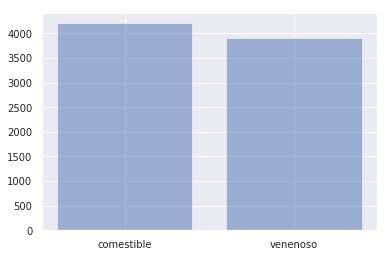

convexa          3656
aplanada         3152
semi-aplanada     828
acampanada        452
hundida            32
conica              4
Name: forma_sombrero, dtype: int64
['convexa' 'acampanada' 'hundida' 'aplanada' 'semi-aplanada' 'conica']


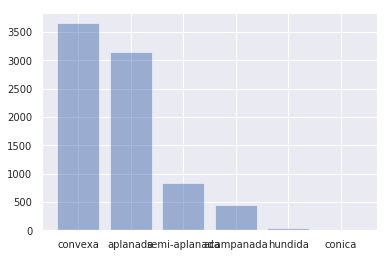

con escamas    3244
liso           2556
fibroso        2320
con surcos        4
Name: superficie_sombrero, dtype: int64
['liso' 'con escamas' 'fibroso' 'con surcos']


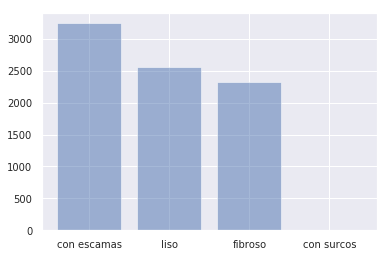

marron      2284
gris        1840
rojo        1500
amarillo    1072
blanco      1040
beige        168
rosa         144
canela        44
verde         16
violeta       16
Name: color_sombrero, dtype: int64
['marron' 'amarillo' 'blanco' 'gris' 'rojo' 'rosa' 'beige' 'violeta'
 'canela' 'verde']


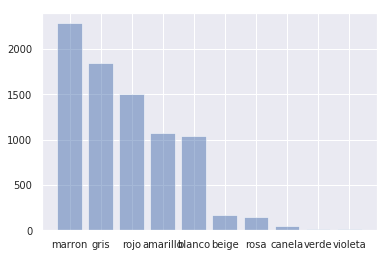

ausentes     4748
Presentes    3376
Name: magulladuras, dtype: int64
['Presentes' 'ausentes']


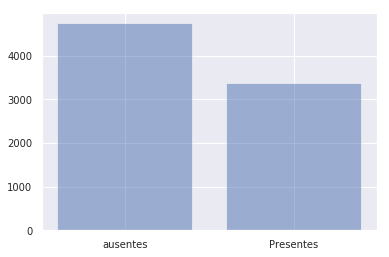

ninguno           3528
podrido           2160
picante            576
pescado            576
anis               400
almendras          400
vinagre            256
madera quemada     192
humedad/rancio      36
Name: olor, dtype: int64
['vinagre' 'almendras' 'anis' 'ninguno' 'podrido' 'madera quemada'
 'pescado' 'picante' 'humedad/rancio']


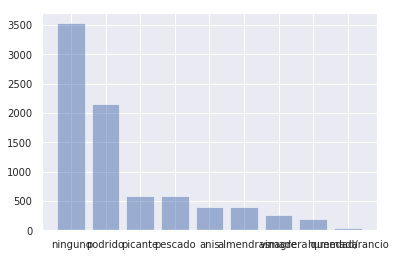

libres        7914
adherentes     210
Name: laminillas, dtype: int64
['libres' 'adherentes']


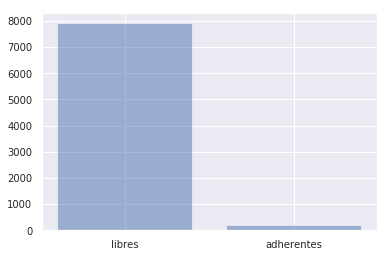

cercanas       6812
amontonadas    1312
Name: espacio_laminillas, dtype: int64
['cercanas' 'amontonadas']


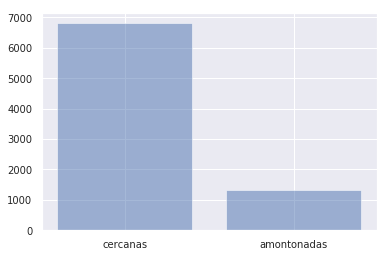

anchas       5612
estrechas    2512
Name: tamaño_laminillas, dtype: int64
['estrechas' 'anchas']


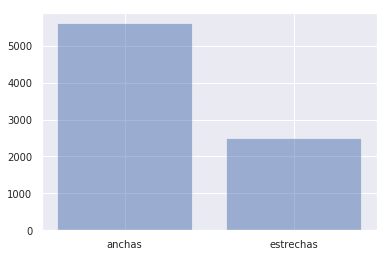

beige        1728
rosa         1492
blanco       1202
marron       1048
gris          752
chocolate     732
violeta       492
negro         408
rojo           96
amarillo       86
naranja        64
verde          24
Name: color_laminillas, dtype: int64
['negro' 'marron' 'gris' 'rosa' 'blanco' 'chocolate' 'violeta' 'rojo'
 'beige' 'verde' 'amarillo' 'naranja']


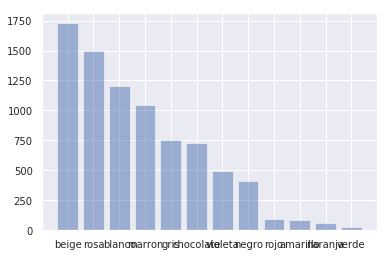

afinado      4608
agrandado    3516
Name: forma_tallo, dtype: int64
['agrandado' 'afinado']


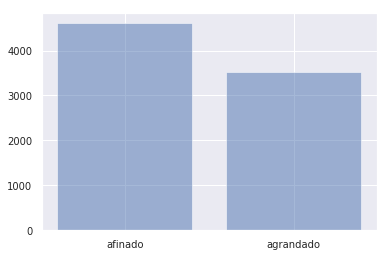

bulboso                 3776
raiz ausente            2480
recto                   1120
un poco hinchado         556
con una raiz extensa     192
Name: raiz_tallo, dtype: int64
['recto' 'un poco hinchado' 'bulboso' 'con una raiz extensa'
 'raiz ausente']


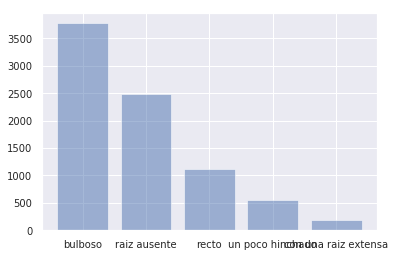

liso        4936
sedoso      2304
fibroso      600
escamoso     284
Name: tallo_debajo_anillo, dtype: int64
['liso' 'fibroso' 'escamoso' 'sedoso']


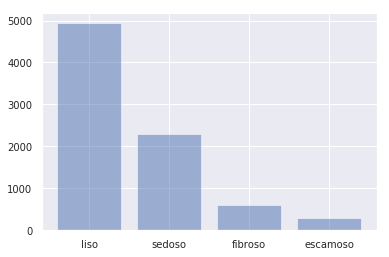

liso        4936
sedoso      2304
fibroso      600
escamoso     284
Name: tallo_debajo_anillo, dtype: int64
['liso' 'fibroso' 'escamoso' 'sedoso']


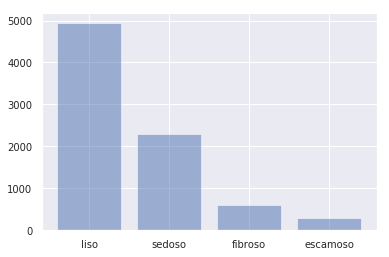

blanco      4464
rosa        1872
gris         576
marron       448
beige        432
naranja      192
amarillo       8
Name: color_tallo_encima_anillo, dtype: int64
['blanco' 'gris' 'rosa' 'marron' 'beige' nan 'naranja' 'amarillo']


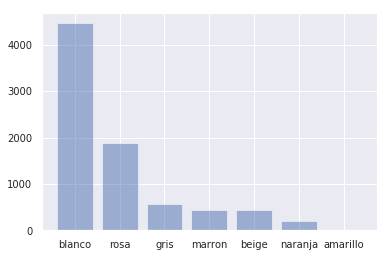

blanco      4384
rosa        1872
gris         576
marron       512
beige        432
naranja      192
amarillo      24
Name: color_tallo_debajo_anillo, dtype: int64
['blanco' 'rosa' 'gris' 'beige' 'marron' nan 'amarillo' 'naranja']


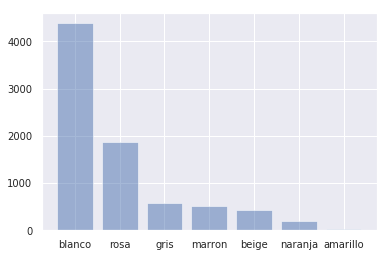

blanco      7924
marron        96
naranja       96
amarillo       8
Name: color_velo, dtype: int64
['blanco' 'marron' 'naranja' 'amarillo']


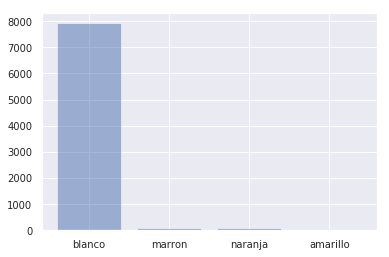

uno        7488
dos         600
ausente      36
Name: numero_anillos, dtype: int64
['uno' 'dos' 'ausente']


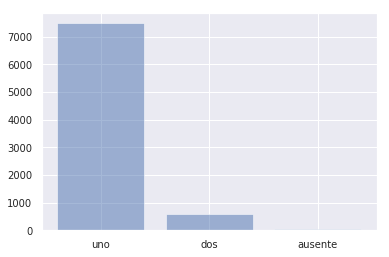

colgante           3968
evanecente         2776
grande             1296
resplandeciente      48
ninguno              36
Name: tipo_anillo, dtype: int64
['colgante' 'evanecente' 'grande' 'resplandeciente' 'ninguno']


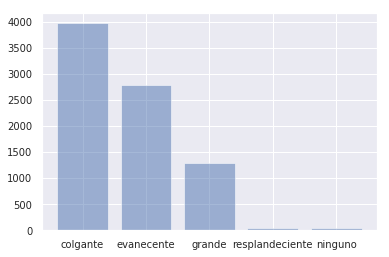

blanco       2388
marron       1968
negro        1872
chocolate    1632
verde          72
beige          48
naranja        48
amarillo       48
violeta        48
Name: color_esporas, dtype: int64
['negro' 'marron' 'violeta' 'chocolate' 'blanco' 'verde' 'naranja'
 'amarillo' 'beige']


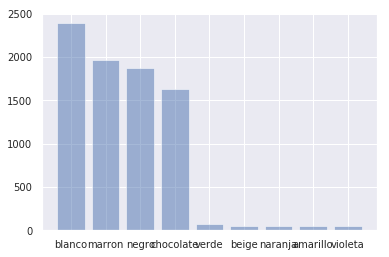

varios        4040
solitarios    1712
disperso      1248
numerosos      400
abundante      384
agrupado       340
Name: poblacion, dtype: int64
['disperso' 'numerosos' 'abundante' 'varios' 'solitarios' 'agrupado']


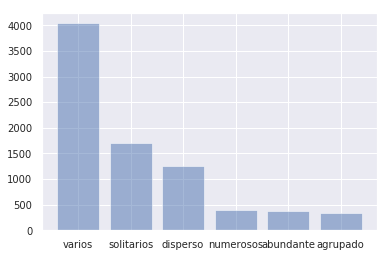

troncos           3148
pasto             2148
caminos           1144
hojas              832
sitios urbanos     368
prados             292
desechos           192
Name: habitat, dtype: int64
['sitios urbanos' 'pasto' 'prados' 'troncos' 'caminos' 'desechos' 'hojas']


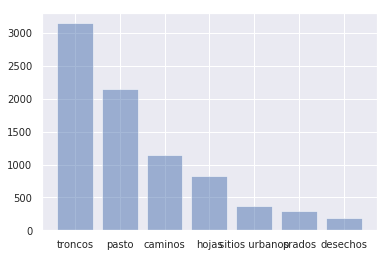

In [14]:
categories = ['clase', 'forma_sombrero', 'superficie_sombrero', 'color_sombrero',
        'magulladuras', 'olor', 'laminillas', 'espacio_laminillas', 'tamaño_laminillas', 
        'color_laminillas', 'forma_tallo', 'raiz_tallo', 'tallo_debajo_anillo', 'tallo_debajo_anillo',
        'color_tallo_encima_anillo', 'color_tallo_debajo_anillo', 'color_velo', 
        'numero_anillos', 'tipo_anillo', 'color_esporas', 'poblacion', 'habitat']

for category in categories:
    print(df[category].value_counts())
    print(df[category].unique())
    plt.bar(df[category].value_counts().index, df[category].value_counts().values, color='b',alpha=0.5)
    plt.show()

A partir de estos graficos pudimos observar varias cosas:

- En el dataset tenemos 4208 hongos clasificados como comestibles y 3916 como no comestibles.
- El tipo de velo tiene solo un tipo de observación
- La raiz del tallo tiene valores '?' que proviene de que la raiz de tallo esta ausente y no de que sean nan.
- La forma del sombrero más frecuente es la conveza y aplanada
- La superficie del sombrero más frecuente es liso, escamoso y fibroso.
- El color del sombrero más frecuente es marrón, seguido por gris, rojo, amarillo, y blanco. 
- La frecuencia de olor más común es que en realidad no huelan a nada. Seguido por olor a pútrido.
- Solo observamos laminillas libres principalmente y baja frecuencia de adheridas.
- El tamaño de las laminillas es mayormente estrecho, su color beige, rosa, blanco y marron.
- El tallo suele ser de textura liso o sedoso y grande.
- El color del velo es frecuentemente blanco.


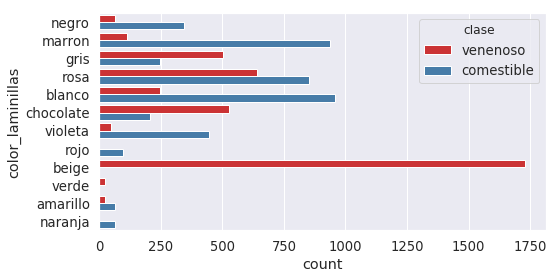

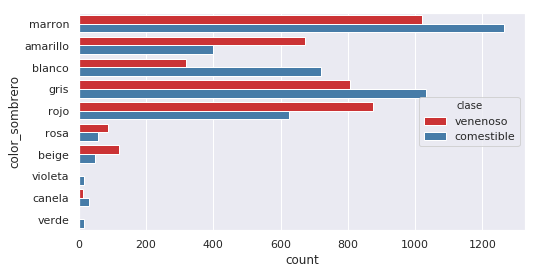

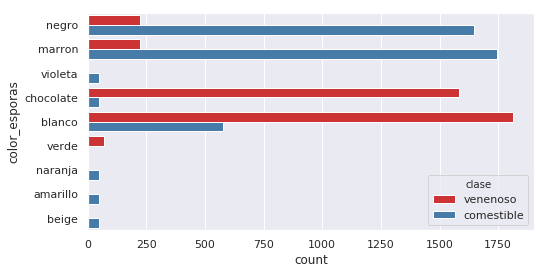

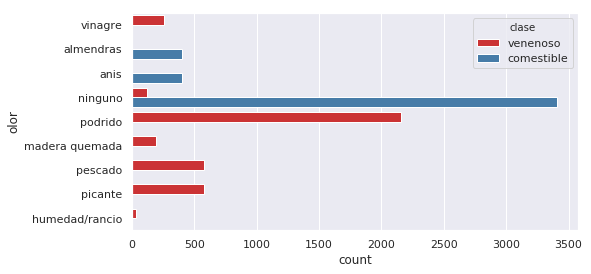

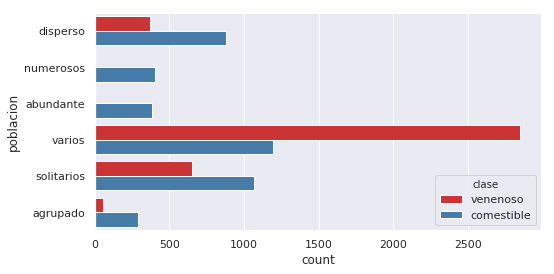

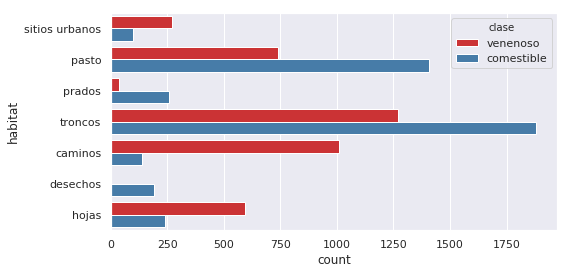

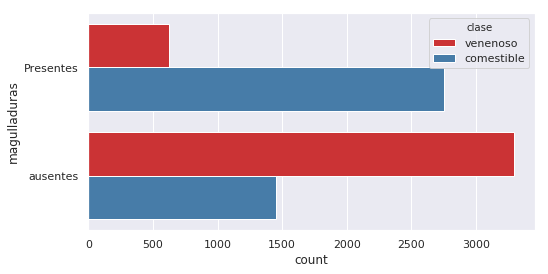

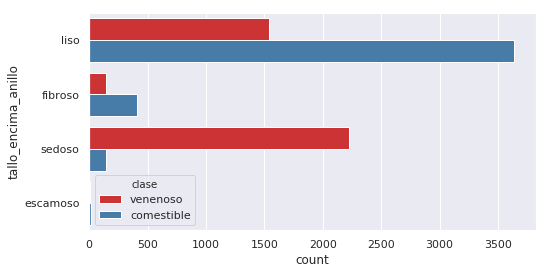

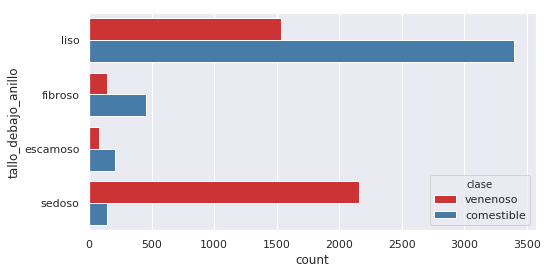

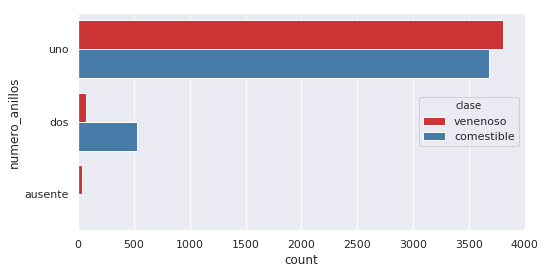

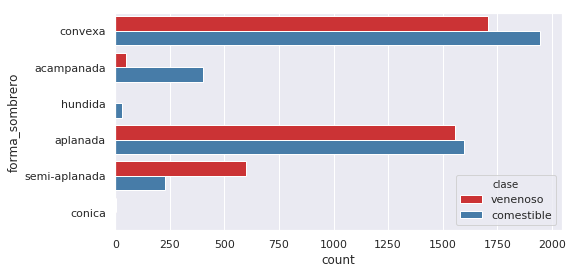

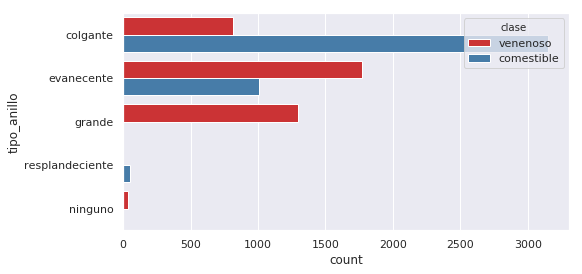

In [15]:
# plt.figure(figsize=[16,12])
#color laminillas
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(8,4))
sns.set(font_scale=1.2)
sns.countplot(y="color_laminillas", hue="clase",  palette="Set1", data=df);

#color sombrero
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(8,4))
sns.set(font_scale=1.0)
sns.countplot(y="color_sombrero", hue="clase",  palette="Set1", data=df);

#color esporas
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(8,4))
sns.set(font_scale=1.0)

sns.countplot(y="color_esporas", hue="clase",  palette="Set1", data=df);

#olor
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(8,4))
sns.set(font_scale=1.0)
sns.countplot(y="olor", hue="clase",  palette="Set1", data=df);

#poblacion
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(8,4))
sns.set(font_scale=1.0)
sns.countplot(y="poblacion", hue="clase",  palette="Set1", data=df);

#Habitat
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(8,4))
sns.set(font_scale=1.0)
sns.countplot(y="habitat", hue="clase",  palette="Set1", data=df);

#madulladuras
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(8,4))
sns.set(font_scale=1.0)
sns.countplot(y="magulladuras", hue="clase",  palette="Set1", data=df);

#tallo_encima_anillo
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(8,4))
sns.set(font_scale=1.0)
sns.countplot(y="tallo_encima_anillo", hue="clase",  palette="Set1", data=df);

#tallo_debajo_anillo
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(8,4))
sns.set(font_scale=1.0)
sns.countplot(y="tallo_debajo_anillo", hue="clase",  palette="Set1", data=df);

#numero_anillos
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(8,4))
sns.set(font_scale=1.0)
sns.countplot(y="numero_anillos", hue="clase",  palette="Set1", data=df);
              
#forma del sombrero
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(8,4))
sns.set(font_scale=1.0)
sns.countplot(y="forma_sombrero", hue="clase",  palette="Set1", data=df)

#tipo sombrero
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(8,4))
sns.set(font_scale=1.0)
sns.countplot(y="tipo_anillo", hue="clase",  palette="Set1", data=df)


In [16]:
for col in df.columns:
    frec = pd.DataFrame(df.groupby(by='clase')[ col ].value_counts(normalize=True))
    frec.columns = ['Frecuencia']
    display(frec)

,,Frecuencia
clase,clase,
comestible,comestible,1.0
venenoso,venenoso,1.0


Frecuencia
clase      forma_sombrero            
comestible convexa           0.462928
           aplanada          0.379278
           acampanada        0.096008
           semi-aplanada     0.054183
           hundida           0.007605
venenoso   convexa           0.436159
           aplanada          0.397344
           semi-aplanada     0.153218
           acampanada        0.012257
           conica            0.001021

Frecuencia
clase      superficie_sombrero            
comestible fibroso                0.370722
           con escamas            0.357414
           liso                   0.271863
venenoso   con escamas            0.444331
           liso                   0.360572
           fibroso                0.194076
           con surcos             0.001021

Frecuencia
clase      color_sombrero            
comestible marron            0.300380
           gris              0.245247
           blanco            0.171103
           rojo              0.148289
           amarillo          0.095057
           rosa              0.013308
           beige             0.011407
           canela            0.007605
           verde             0.003802
           violeta           0.003802
venenoso   marron            0.260470
           rojo              0.223698
           gris              0.206333
           amarillo          0.171604
           blanco            0.081716
           beige             0.030644
           rosa              0.022472
           canela            0.003064

Frecuencia
clase      magulladuras            
comestible Presentes       0.653992
           ausentes        0.346008
venenoso   ausentes        0.840654
           Presentes       0.159346

Frecuencia
clase      olor                      
comestible ninguno           0.809886
           almendras         0.095057
           anis              0.095057
venenoso   podrido           0.551583
           pescado           0.147089
           picante           0.147089
           vinagre           0.065373
           madera quemada    0.049030
           ninguno           0.030644
           humedad/rancio    0.009193

Frecuencia
clase      laminillas            
comestible libres        0.954373
           adherentes    0.045627
venenoso   libres        0.995403
           adherentes    0.004597

Frecuencia
clase      espacio_laminillas            
comestible cercanas              0.714829
           amontonadas           0.285171
venenoso   cercanas              0.971399
           amontonadas           0.028601

Frecuencia
clase      tamaño_laminillas            
comestible anchas               0.931559
           estrechas            0.068441
venenoso   estrechas            0.567926
           anchas               0.432074

Frecuencia
clase      color_laminillas            
comestible blanco              0.227186
           marron              0.222433
           rosa                0.202471
           violeta             0.105513
           negro               0.081749
           gris                0.058935
           chocolate           0.048479
           rojo                0.022814
           amarillo            0.015209
           naranja             0.015209
venenoso   beige               0.441267
           rosa                0.163432
           chocolate           0.134831
           gris                0.128703
           blanco              0.062819
           marron              0.028601
           negro               0.016343
           violeta             0.012257
           verde               0.006129
           amarillo            0.005618

Frecuencia
clase      forma_tallo            
comestible afinado        0.615970
           agrandado      0.384030
venenoso   afinado        0.514811
           agrandado      0.485189

Frecuencia
clase      raiz_tallo                      
comestible bulboso                 0.456274
           recto                   0.205323
           raiz ausente            0.171103
           un poco hinchado        0.121673
           con una raiz extensa    0.045627
venenoso   bulboso                 0.473953
           raiz ausente            0.449438
           recto                   0.065373
           un poco hinchado        0.011236

Frecuencia
clase      tallo_encima_anillo            
comestible liso                   0.865019
           fibroso                0.096958
           sedoso                 0.034221
           escamoso               0.003802
venenoso   sedoso                 0.568948
           liso                   0.392237
           fibroso                0.036772
           escamoso               0.002043

Frecuencia
clase      tallo_debajo_anillo            
comestible liso                   0.807985
           fibroso                0.108365
           escamoso               0.049430
           sedoso                 0.034221
venenoso   sedoso                 0.551583
           liso                   0.392237
           fibroso                0.036772
           escamoso               0.019408

Frecuencia
clase      color_tallo_encima_anillo            
comestible blanco                       0.669261
           gris                         0.140078
           rosa                         0.140078
           naranja                      0.046693
           marron                       0.003891
venenoso   blanco                       0.441237
           rosa                         0.334021
           beige                        0.111340
           marron                       0.111340
           amarillo                     0.002062

Frecuencia
clase      color_tallo_debajo_anillo            
comestible blanco                       0.657588
           gris                         0.140078
           rosa                         0.140078
           naranja                      0.046693
           marron                       0.015564
venenoso   blanco                       0.432990
           rosa                         0.334021
           marron                       0.115464
           beige                        0.111340
           amarillo                     0.006186

Frecuencia
clase      color_velo            
comestible blanco        0.954373
           marron        0.022814
           naranja       0.022814
venenoso   blanco        0.997957
           amarillo      0.002043

Frecuencia
clase      numero_anillos            
comestible uno               0.874525
           dos               0.125475
venenoso   uno               0.972421
           dos               0.018386
           ausente           0.009193

Frecuencia
clase      tipo_anillo                
comestible colgante           0.749049
           evanecente         0.239544
           resplandeciente    0.011407
venenoso   evanecente         0.451481
           grande             0.330950
           colgante           0.208376
           ninguno            0.009193

Frecuencia
clase      color_esporas            
comestible marron           0.414449
           negro            0.391635
           blanco           0.136882
           amarillo         0.011407
           beige            0.011407
           chocolate        0.011407
           naranja          0.011407
           violeta          0.011407
venenoso   blanco           0.462717
           chocolate        0.404494
           marron           0.057201
           negro            0.057201
           verde            0.018386

Frecuencia
clase      poblacion             
comestible varios        0.283270
           solitarios    0.252852
           disperso      0.209125
           numerosos     0.095057
           abundante     0.091255
           agrupado      0.068441
venenoso   varios        0.727273
           solitarios    0.165475
           disperso      0.093973
           agrupado      0.013279

Frecuencia
clase      habitat                   
comestible troncos           0.446768
           pasto             0.334601
           prados            0.060837
           hojas             0.057034
           desechos          0.045627
           caminos           0.032319
           sitios urbanos    0.022814
venenoso   troncos           0.323800
           caminos           0.257406
           pasto             0.188968
           hojas             0.151175
           sitios urbanos    0.069459
           prados            0.009193


A partir de esta información podemos concluir que:
- Es más frecuente que los hongos comestibles no tengan olor y que los hongos venenosos suelen tener olor a podrido, pescado, picante y vinagre. Los hongos con olor a anis o almendras van a ser comestibles.
- En cuanto al color de laminillas, en los venenosos es beige y no hay hongos comestibles que presenten este color.
- El color de sombrero tiene una distribución uniforme entre ambas clases.
- Sólo los hongos venenosos tienen esporas color verde. Sólo los comestibles tienen esporas naranjas, amarillas, violetas o beige. 
- Los hongos comestibles tienen una frecuencia mayor en esporas negras y marrones, mientras que las venenosas en color chocolate y blanco.
- Sólo hongos venenosos tiene olores fuertes (vinagre, pútrido, pescado, etc)
- Los hongos comestibles en general no tienen olor, o tienen olores más suaves como a almendras y a anis.
- En cuánto a su población, se refiere más a la distribución y podemos ver que solo los hongos comestubles se encuentran en grupos de abundantes individuos. Este tipo no esta en los venenosos, siendo más frecuente encontrarlos de a varios (aquí interpretamos que no suelen ser demasiados individuos)
- En cuánto a su habitat, podemos ver que hay una amplia distribución por todo tipo. Ya en el gráfico de correlación vimos que no había una fuerte asociación con la clase. Curiosamente, en los desechos se encuentran solo los comestibles.
- Sólo los hongos venenosos presentan laminillas beige y verdes. Sólo los comestibles presentan laminillas naranjas.
- Las magulladuras se refiere a cuando se corta al hongo y se produce un cambio de coloración parecido a tinta o venas. Eso es más frecuente que ocurra en hongos comestibles.
- El tallo encima y debajo del anillo suele ser sedoso en hongos venenosos. En los comestibles es más frecuente el tallo liso.
- respecto al número de anillos, solemos tener una frecuencia similar en ambos, sólamente los hongos venenosos pueden no presentar anillo.
- La forma de sombrero conica esta presente solo en hongos venenosos. 
- La forma de sombrero hundida esta presente solo en hongos comestibles y la mayor frecuencia de la forma de sombrero es convexa o acampanada.
- El tipo de anillo colgante es más característico en los hongos comestibles. Sólo estos presentan también anillo resplandeciente. 
- Solo los hongos venenosos presentan anillo grande.

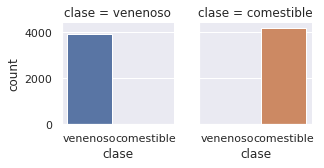

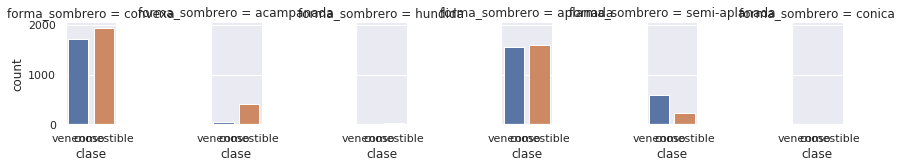

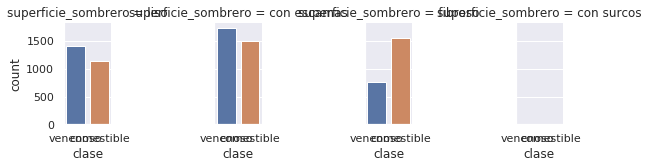

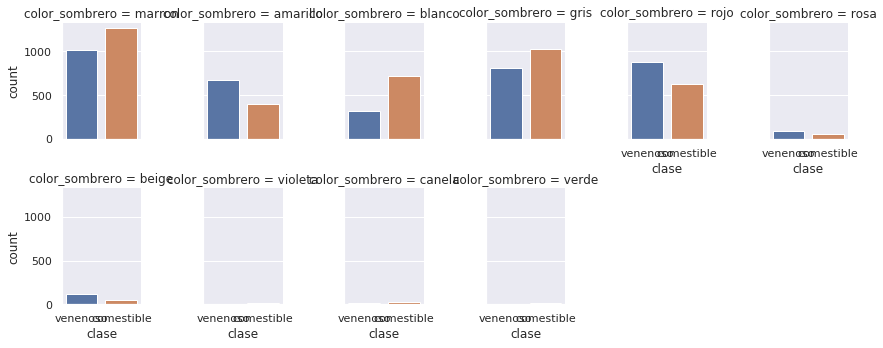

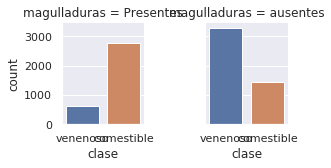

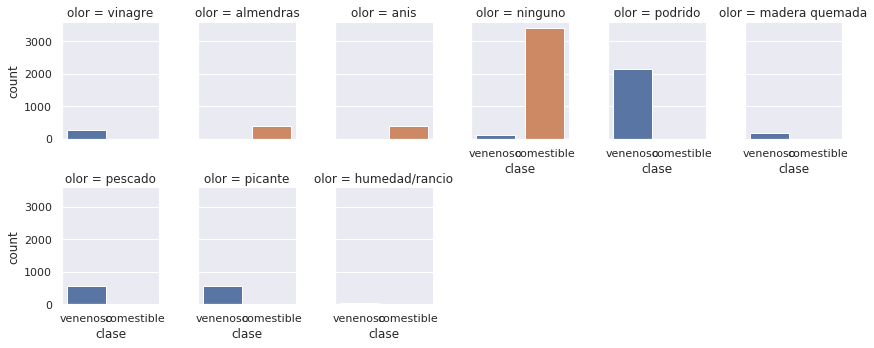

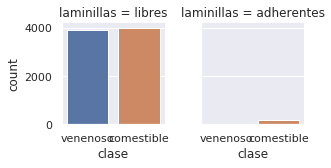

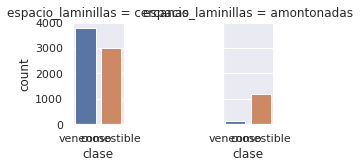

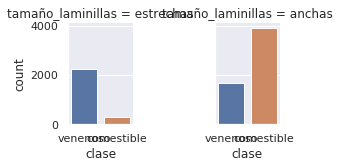

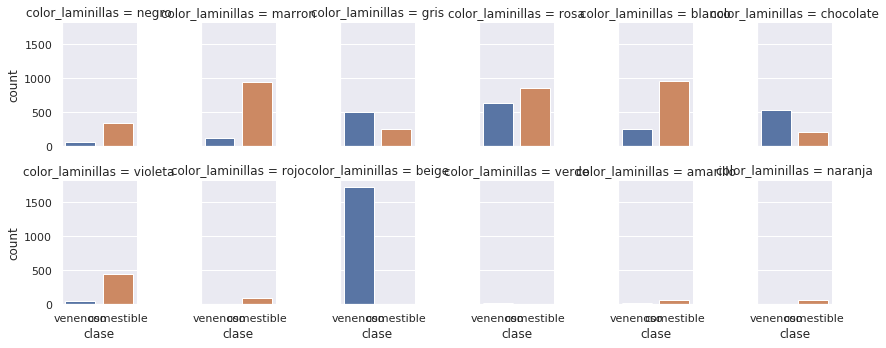

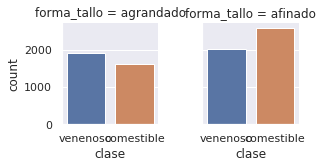

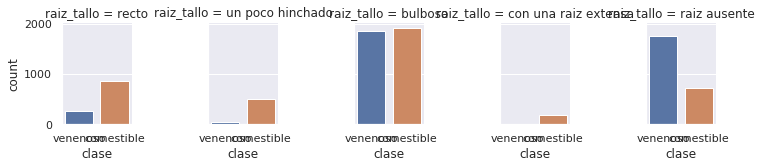

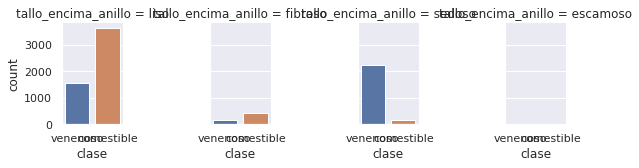

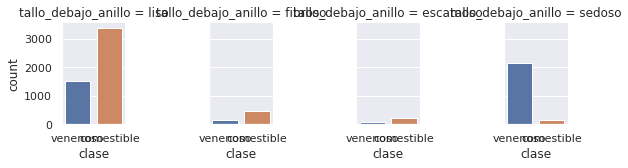

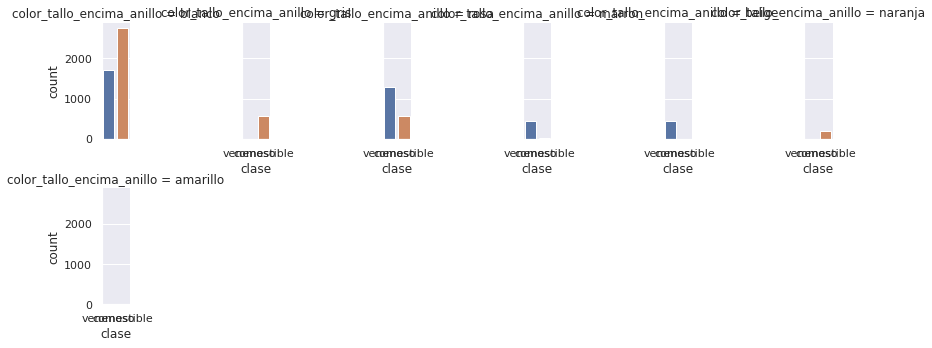

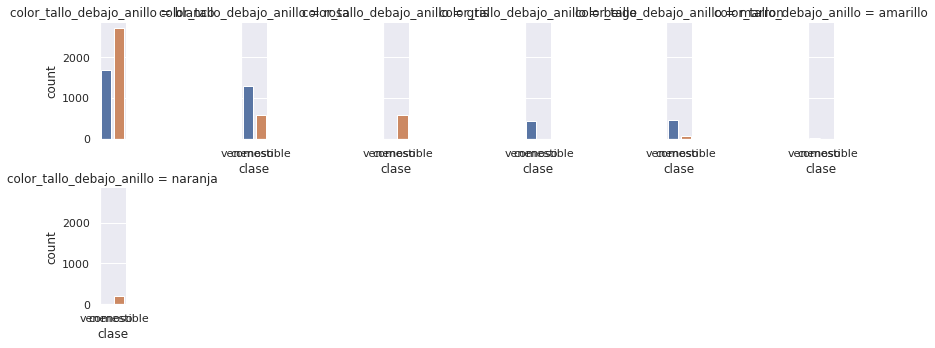

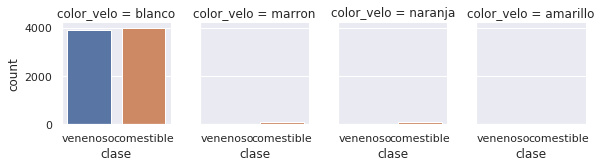

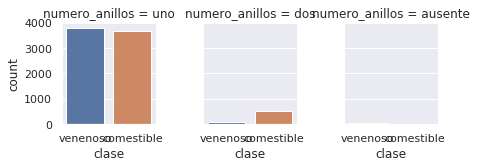

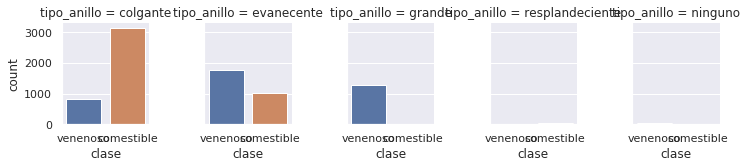

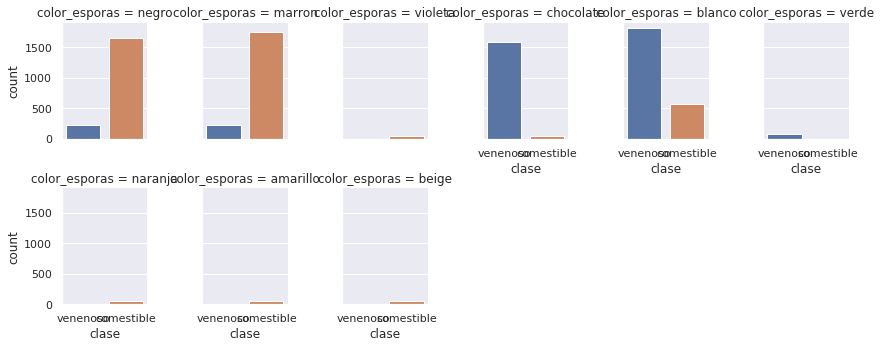

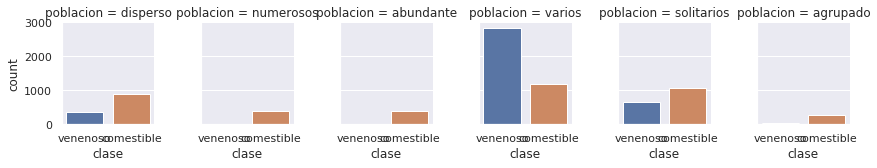

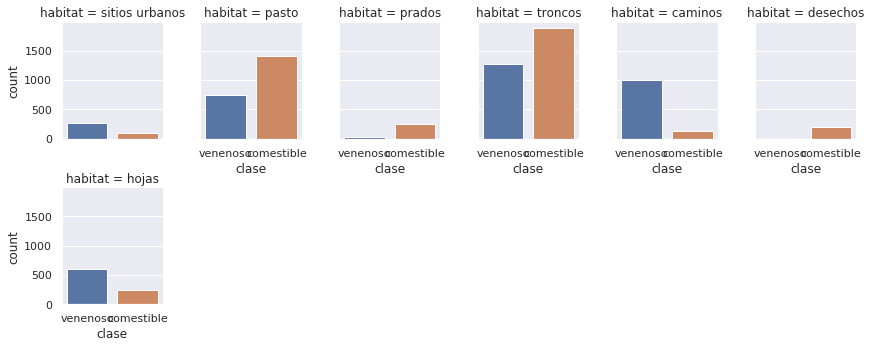

In [17]:
warnings.simplefilter("ignore")
for col in df.columns:
    g = sns.factorplot("clase", col = col, data=df,
                        kind="count", size=2.5, aspect=.8, col_wrap=6, legend=True)

# [Feature Engineer](#Feature-Engineer)
[Volver](#Índice)

Como 'clase' va a ser la variable target o a predecir modificamos el valor de comestible == 0 y venenoso == 1

In [18]:
df.clase = df.clase.apply(lambda x: 1 if x == 'venenoso' else 0)

In [19]:
df.head()

,clase,forma_sombrero,superficie_sombrero,color_sombrero,magulladuras,olor,laminillas,espacio_laminillas,tamaño_laminillas,color_laminillas,forma_tallo,raiz_tallo,tallo_encima_anillo,tallo_debajo_anillo,color_tallo_encima_anillo,color_tallo_debajo_anillo,color_velo,numero_anillos,tipo_anillo,color_esporas,poblacion,habitat
0,1,convexa,liso,marron,Presentes,vinagre,libres,cercanas,estrechas,negro,agrandado,recto,liso,liso,blanco,blanco,blanco,uno,colgante,negro,disperso,sitios urbanos
1,0,convexa,liso,amarillo,Presentes,almendras,libres,cercanas,anchas,negro,agrandado,un poco hinchado,liso,liso,blanco,blanco,blanco,uno,colgante,marron,numerosos,pasto
2,0,acampanada,liso,blanco,Presentes,anis,libres,cercanas,anchas,marron,agrandado,un poco hinchado,liso,liso,blanco,blanco,blanco,uno,colgante,marron,numerosos,prados
3,1,convexa,con escamas,blanco,Presentes,vinagre,libres,cercanas,estrechas,marron,agrandado,recto,liso,liso,blanco,blanco,blanco,uno,colgante,negro,disperso,sitios urbanos
4,0,convexa,liso,gris,ausentes,ninguno,libres,amontonadas,anchas,negro,afinado,recto,liso,liso,blanco,blanco,blanco,uno,evanecente,marron,abundante,pasto


Para el resto de las features vamos a convertirlas a variables dummies.

In [20]:
df.shape

(8124, 22)

In [21]:
df = pd.get_dummies(df)
display(df.shape)
display(df.columns)

(8124, 113)

Index(['clase', 'forma_sombrero_acampanada', 'forma_sombrero_aplanada',
       'forma_sombrero_conica', 'forma_sombrero_convexa',
       'forma_sombrero_hundida', 'forma_sombrero_semi-aplanada',
       'superficie_sombrero_con escamas', 'superficie_sombrero_con surcos',
       'superficie_sombrero_fibroso',
       ...
       'poblacion_numerosos', 'poblacion_solitarios', 'poblacion_varios',
       'habitat_caminos', 'habitat_desechos', 'habitat_hojas', 'habitat_pasto',
       'habitat_prados', 'habitat_sitios urbanos', 'habitat_troncos'],
      dtype='object', length=113)

**Armamos la matriz de predictores ( 𝑋 ) y el target ( 𝑦 )**

In [22]:
# definimos X e y
X = df.drop('clase', axis = 1)
y = df['clase']

display(X.shape, y.shape)
display(X.head())

(8124, 112)

(8124,)

,forma_sombrero_acampanada,forma_sombrero_aplanada,forma_sombrero_conica,forma_sombrero_convexa,forma_sombrero_hundida,forma_sombrero_semi-aplanada,superficie_sombrero_con escamas,superficie_sombrero_con surcos,superficie_sombrero_fibroso,superficie_sombrero_liso,color_sombrero_amarillo,color_sombrero_beige,color_sombrero_blanco,color_sombrero_canela,color_sombrero_gris,color_sombrero_marron,color_sombrero_rojo,color_sombrero_rosa,color_sombrero_verde,color_sombrero_violeta,magulladuras_Presentes,magulladuras_ausentes,olor_almendras,olor_anis,olor_humedad/rancio,olor_madera quemada,olor_ninguno,olor_pescado,olor_picante,olor_podrido,olor_vinagre,laminillas_adherentes,laminillas_libres,espacio_laminillas_amontonadas,espacio_laminillas_cercanas,tamaño_laminillas_anchas,tamaño_laminillas_estrechas,color_laminillas_amarillo,color_laminillas_beige,color_laminillas_blanco,color_laminillas_chocolate,color_laminillas_gris,color_laminillas_marron,color_laminillas_naranja,color_laminillas_negro,color_laminillas_rojo,color_laminillas_rosa,color_laminillas_verde,color_laminillas_violeta,forma_tallo_afinado,forma_tallo_agrandado,raiz_tallo_bulboso,raiz_tallo_con una raiz extensa,raiz_tallo_raiz ausente,raiz_tallo_recto,raiz_tallo_un poco hinchado,tallo_encima_anillo_escamoso,tallo_encima_anillo_fibroso,tallo_encima_anillo_liso,tallo_encima_anillo_sedoso,tallo_debajo_anillo_escamoso,tallo_debajo_anillo_fibroso,tallo_debajo_anillo_liso,tallo_debajo_anillo_sedoso,color_tallo_encima_anillo_amarillo,color_tallo_encima_anillo_beige,color_tallo_encima_anillo_blanco,color_tallo_encima_anillo_gris,color_tallo_encima_anillo_marron,color_tallo_encima_anillo_naranja,color_tallo_encima_anillo_rosa,color_tallo_debajo_anillo_amarillo,color_tallo_debajo_anillo_beige,color_tallo_debajo_anillo_blanco,color_tallo_debajo_anillo_gris,color_tallo_debajo_anillo_marron,color_tallo_debajo_anillo_naranja,color_tallo_debajo_anillo_rosa,color_velo_amarillo,color_velo_blanco,color_velo_marron,color_velo_naranja,numero_anillos_ausente,numero_anillos_dos,numero_anillos_uno,tipo_anillo_colgante,tipo_anillo_evanecente,tipo_anillo_grande,tipo_anillo_ninguno,tipo_anillo_resplandeciente,color_esporas_amarillo,color_esporas_beige,color_esporas_blanco,color_esporas_chocolate,color_esporas_marron,color_esporas_naranja,color_esporas_negro,color_esporas_verde,color_esporas_violeta,poblacion_abundante,poblacion_agrupado,poblacion_disperso,poblacion_numerosos,poblacion_solitarios,poblacion_varios,habitat_caminos,habitat_desechos,habitat_hojas,habitat_pasto,habitat_prados,habitat_sitios urbanos,habitat_troncos
0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


Observación de la frecuencia

In [23]:
print("0: Comestible\n1: Venenoso")
y.value_counts(normalize=True)  

0: Comestible
1: Venenoso


0    0.517971
1    0.482029
Name: clase, dtype: float64

Podemos ver la proporcion de casos, como es muy parejo no hace falta estratificar

# [PCA](#PCA)
[Volver](#Índice)

Realizamos un PCA para visualizar la clase en 2D.
Frecuentemente la reducción de la dimensionalidad se usa como una ayuda para visualizar datos

In [24]:
# aplicamos analisis de componentes principales para reducir a 2D y poder graficar la clase
from sklearn.decomposition import PCA

pca_2cp = PCA(n_components=2)
pca_2cp.fit(X)
X_pca = pca_2cp.transform(X)
X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2']) 
display(X_pca.head())

,PC1,PC2
0,-0.996179,-0.947114
1,-1.441729,-0.164303
2,-1.524059,-0.408904
3,-1.151768,-0.676073
4,-0.617441,-0.996403


In [25]:
df_pca = pd.concat([X_pca, pd.DataFrame(y.apply(lambda x: 'venenoso' if x == 1 else 'comestible'))], axis=1)
df_pca.head(2)

,PC1,PC2,clase
0,-0.996179,-0.947114,venenoso
1,-1.441729,-0.164303,comestible


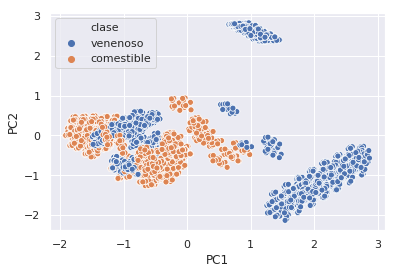

In [26]:
sns.scatterplot(x='PC1', y='PC2', hue='clase', data=df_pca);

Por PCA se nota un poco de solapamiento entre los hongos comestibles y un grupo de venenosos. Esto probablemente se deba a que existen tres grupos de hongos. Comestibles, venenosos y dudosos, pero estos ultimos los consideran como venenosos


**Separamos los datos para train y test  y seteamos el parámetro test_size en 0.3 que será la propoción de los datos que vamos a separar para hacer la evaluación.**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5443, 112) (2681, 112) (5443,) (2681,)


# [Análisis utilizando Naive Bayes](#Análisis-utilizando-Naive-Bayes)
[Volver](#Índice)

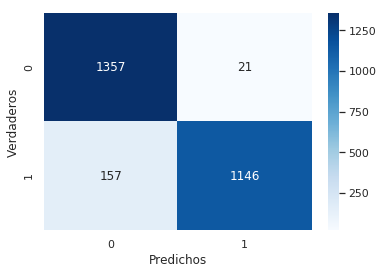

In [28]:
from sklearn.naive_bayes import BernoulliNB
model_NBB = BernoulliNB()
model_NBB.fit(X_train, y_train);
y_predNBB = model_NBB.predict(X_test)
y_probs_NB = model_NBB.predict_proba(X_test)   # esto lo definimos para evaluar en curvas ROC
confusion_matrix(y_test, y_predNBB)
sns.heatmap(confusion_matrix(y_test, y_predNBB), annot=True, fmt='d', cmap='Blues')

plt.ylabel('Verdaderos')
plt.xlabel('Predichos');


In [29]:
print('Accuracy NBB=', accuracy_score(y_test, y_predNBB))
print('Recall NBB =', recall_score(y_test, y_predNBB))
print('Precision NBB =', precision_score(y_test, y_predNBB))

Accuracy NBB= 0.9336068631107796
Recall NBB = 0.8795088257866462
Precision NBB = 0.9820051413881749


Calcula la probabilidad de Y en base a cada uno de los features de forma independiente. 
En ningún momento se hacen comparaciones entre distintos features, con lo cual todas pueden tener unidades distintas y no es un problema para el modelo. No tiene hiperparametros.

In [30]:
model_NB = GaussianNB()
model_NB.fit(X_train, y_train);
y_predNB = model_NB.predict(X_test)
print('Recall NB =', recall_score(y_test, y_predNB))

Recall NB = 0.9992325402916347


**Evaluacion del modelo NB**

In [31]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_predNB)
print(confusion)

[[1295   83]
 [   1 1302]]


**Calculamos el accuracy como la proporción samples correctamente clasificados sobre el total de samples. Es una métrica de performance general que no tolera la presencia de Falsos Negativos o Falsos Positivos**


$\large Accuracy = \frac{TP + TN}{(TP + TN + FP + FN)}$

In [32]:
print('Accuracy NB=', accuracy_score(y_test, y_predNB))

Accuracy NB= 0.9686684073107049


**Calculamos el Recall que nos va a decir qué tan "sensible" es este modelo a la hora de detectar los verdaderos positivos (TP) sobre todos los casos que son positivos (TP y falsos negativos: FN)**

$\large recall = \frac{TP}{(FN + TP)}$

In [33]:
# Recall = TP /(FN + TP) Verdaderos Positivos del Total de Verdaderos (los Falsos Negativos + los Verdaderos Positivos)
#Mide la capacidad del modelo de detectar los verdaderos positivos (TP) sobre todos los casos que son positivos

print('Recall NB =', recall_score(y_test, y_predNB))

Recall NB = 0.9992325402916347


**Calculamos la precision del clasificador al predecir las instancias positivas.**

$\large Prec = \frac{TP}{(FP + TP)}$

In [34]:
# Mide qué tan "preciso" es el clasificador al predecir las instancias positivas

print('Precision NB =', precision_score(y_test, y_predNB))

Precision NB = 0.940072202166065


Vemos que tanto el accuracy, como el recall y la precisión dieron muy altos.

**Calculamos el promedio armónico entre precision y recall.**

In [35]:
print('f1 NB =', f1_score(y_test,y_predNB))

f1 NB = 0.96875


Cuanto mayor es el valor de f1 mejor mi modelo. Significa que se esta equivocando poco.

**Elaboramos la matriz de confusión Naive Bayes:**

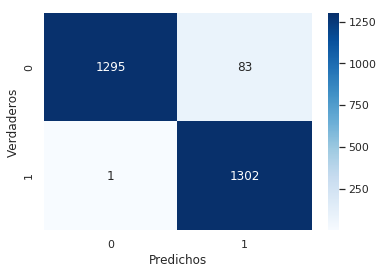

In [36]:
confusion_matrix(y_test, y_predNB)
sns.heatmap(confusion_matrix(y_test, y_predNB), annot=True, fmt='d', cmap='Blues')

plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

De los 2681 del test se equivoca en 83 que los clasifica como Falsos positivos (son comestibles pero los clasifica como venenosos, lo cual no seria tan grave en el caso que es dejar o no de recolectar hongos) y uno que lo clasifica como falso negativo. 

# [Feature Selection con SelectKBest](#Feature-Selection-con-SelectKBest)
[Volver](#Índice)

Ahora vamos a analizar los datos utilizando una reducción en la cantidad de variables a considerar. Vamos a usar el método selectKbest que toma k como parametro siendo la cantidad de "mejores" features que serán seleccionadas y el dataframe como input

In [37]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression, chi2, f_classif

def select_kbest_reg(data_frame, target, k=2):
    """
    Seleccionado K-Best features para regresión
    :param data_frame: Un dataframe con datos
    :param target: target en el dataframe
    :param k: cantidad deseada de features
    :devuelve un dataframe llamado feature_scores con los scores para cada feature
    """
    X = data_frame.drop(target, axis=1)
    y = data_frame[target]
    
    # aca probamos con Chi2 como score_function
    
    feat_selector = SelectKBest(chi2, k=k)
    feat_selector.fit(X, y)
    
    feat_scores = pd.DataFrame()
    feat_scores["Attribute"] = X.columns
    feat_scores["F Score"] = feat_selector.scores_
    feat_scores["P Value"] = feat_selector.pvalues_
    feat_scores["Support"] = feat_selector.get_support()
    
    return feat_scores

kbest_feat = select_kbest_reg(df, "clase", k=25)
kbest_feat = kbest_feat.sort_values(["F Score", "P Value"], ascending=[False, False])
kbest_feat


,Attribute,F Score,P Value,Support
26,olor_ninguno,2836.187954,0.000000e+00,True
29,olor_podrido,2321.062308,0.000000e+00,True
59,tallo_encima_anillo_sedoso,1986.408494,0.000000e+00,True
63,tallo_debajo_anillo_sedoso,1914.371389,0.000000e+00,True
38,color_laminillas_beige,1856.849847,0.000000e+00,True
36,tamaño_laminillas_estrechas,1636.606833,0.000000e+00,True
93,color_esporas_chocolate,1560.187561,0.000000e+00,True
87,tipo_anillo_grande,1392.637385,8.362650e-305,True
85,tipo_anillo_colgante,1213.995219,5.543220e-266,True
20,magulladuras_Presentes,1194.277352,1.069037e-261,True


Ahora vamos a realizar efectivamente la selección de los features en True

In [38]:
select = kbest_feat.loc[kbest_feat['Support'] == True,'Attribute']
df_reduced = df[select]
df_reduced.head()

,olor_ninguno,olor_podrido,tallo_encima_anillo_sedoso,tallo_debajo_anillo_sedoso,color_laminillas_beige,tamaño_laminillas_estrechas,color_esporas_chocolate,tipo_anillo_grande,tipo_anillo_colgante,magulladuras_Presentes,color_esporas_marron,color_esporas_negro,magulladuras_ausentes,espacio_laminillas_amontonadas,poblacion_varios,color_esporas_blanco,tamaño_laminillas_anchas,habitat_caminos,tallo_encima_anillo_liso,olor_pescado,olor_picante,color_laminillas_marron,tallo_debajo_anillo_liso,color_tallo_encima_anillo_gris,color_tallo_debajo_anillo_gris
0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0
3,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0
4,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,1,0,0


In [39]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: clase, dtype: int64

In [40]:
# Redefinimos la matriz de features X con el df que solo posee las mejores fichurs
X = df_reduced
y = df['clase']

display(X.shape, y.shape)

(8124, 25)

(8124,)

**A continuacion realizamos un grafico de correlacion entre las features y el target con el metodo Kbest**

Creamos variables dummies del target

In [41]:
y_dummie = pd.get_dummies(y, columns=['comestible','venenoso'])
y_dummie = y_dummie.rename(columns={0:'comestible', 1:'venenoso'})
y_dummie.head()

,comestible,venenoso
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0


In [42]:
df_heatmap_kbest = pd.concat([y_dummie, df_reduced], axis=1)
df_heatmap_kbest.head(2)

,comestible,venenoso,olor_ninguno,olor_podrido,tallo_encima_anillo_sedoso,tallo_debajo_anillo_sedoso,color_laminillas_beige,tamaño_laminillas_estrechas,color_esporas_chocolate,tipo_anillo_grande,tipo_anillo_colgante,magulladuras_Presentes,color_esporas_marron,color_esporas_negro,magulladuras_ausentes,espacio_laminillas_amontonadas,poblacion_varios,color_esporas_blanco,tamaño_laminillas_anchas,habitat_caminos,tallo_encima_anillo_liso,olor_pescado,olor_picante,color_laminillas_marron,tallo_debajo_anillo_liso,color_tallo_encima_anillo_gris,color_tallo_debajo_anillo_gris
0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0


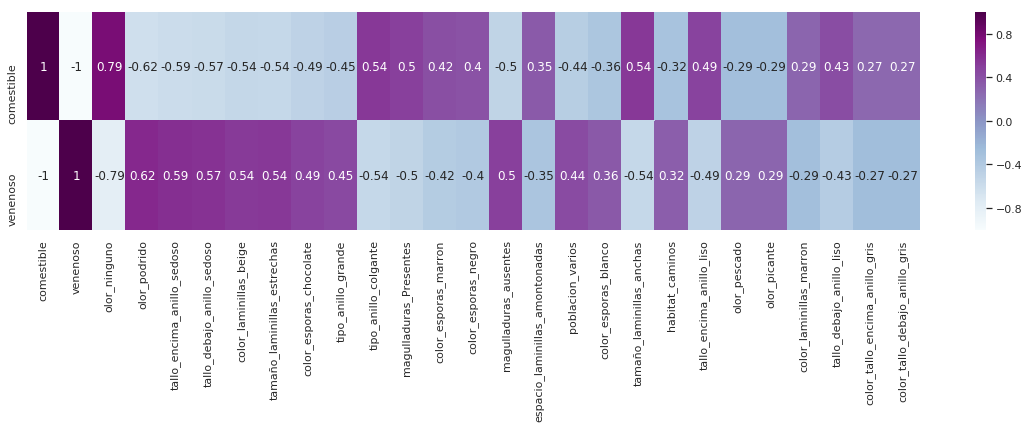

In [43]:
sns.set(rc={'figure.figsize':(20,4)})
sns.heatmap(df_heatmap_kbest.corr().iloc[[0,1]], annot=True, cmap='BuPu');

Los hongos comestibles se correlacionan positivamente con olor al igual que lo que se observa en Cramers V. En este caso podemos ver que la correlación es a ningún olor principalmente. Tambien se correlacionan con el tamaño de laminillas anchas y el tipo de anillo colgante, la presencia de magulladuras, color de esporas marrón y negro, el tallo encima y debajo del anillo liso.  (Estas observaciones las habíamos notado en el gráfico de barras).
En el caso de los hongos venenosos el olor a podrido es el que correlaciona más fuertemente. Otros tipos de olores que correlacionan con estos hongos son el olor a pescado y picante. Hay correlación tambien en el tallo encima y debajo de anillo sedoso y grande, color de laminillas beige, tallo estrecho y magulladuras ausentes. En cuanto a la población se observa correlación con los caminos y que se encuentran de a varios (Esto coincide con los gráficos de barra también)

Volvemos a hacer el train test split utilizando el nuevo dataframe con la nueva matriz de features

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 

(5443, 25) (2681, 25) (5443,) (2681,)


# [Análisis utilizando KNN: Vecinos más cercanos](#Análisis-utilizando-KNN:-Vecinos-más-cercanos)
[Volver](#Índice)

Clasiﬁca cada puntos nuevos buscando los “k” datos del conjunto de entrenamiento más cercanos y promediando la clase de éstos. El método se basa en una matriz de distancias. Si los features no se encuentran todos en la misma escala una dimensión podría tener arbitrariamente más peso que otras a la hora de determinar las distancias.
K: La cantidad de vecinos que se usa en la clasiﬁcación. A mayor K, mayor sesgo y menor varianza. - Weight: Si, dentro de los K vecinos más cercanos, se quiere ponderar más a algunos para hacer la clasiﬁcación.

Agregamos Jaccard y Hamming en las métricas ya que son las típicas usadas para variables categóricas

In [45]:
from sklearn.neighbors import DistanceMetric
k_range = list(range(1, 4))
weight_options = ['uniform', 'distance']
metrics = ['euclidean', 'jaccard','hamming']
knn = KNeighborsClassifier() # instanciamos la clase con todos los param por default
param_grid = dict(n_neighbors=k_range, weights=weight_options, metric=metrics)  
print(param_grid)

{'n_neighbors': [1, 2, 3], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'jaccard', 'hamming']}


Instanciamos el método `GridSearchCV`:

In [46]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train) 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean', 'jaccard', 'hamming'],
                         'n_neighbors': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [47]:
print("Escogemos el mejor modelo:", grid.best_estimator_)
print("\n\nEscogemos el mejor score:", grid.best_score_)
print("\n\nEscogemos los mejores parametros:", grid.best_params_)

Escogemos el mejor modelo: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


Escogemos el mejor score: 1.0


Escogemos los mejores parametros: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}


Observamos que a pesar de haber incluido a Hamming y Jaccard, la métrica elegida por el modelo fue euclidean y 1 el neighbor de distancia

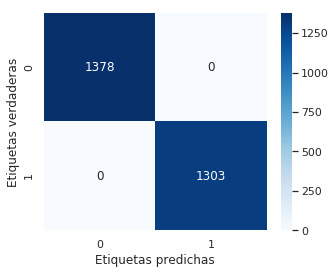

In [48]:
y_pred_knn = grid.predict(X_test)

y_probs_knn = grid.predict_proba(X_test)  # esto lo definimos para evaluar en curvas ROC

sns.set(rc={'figure.figsize':(5,4)})
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, cbar=True, fmt='d', cmap='Blues')
plt.ylabel('Etiquetas verdaderas')
plt.xlabel('Etiquetas predichas');

Utilizando el metodo de reducción de features de Kbest, GridSearch y KNN obtuvimos una matriz de confusión sin falsos positivos o negativos. 

### Evaluamos el Modelo KNN

Calculamos el accuracy

In [49]:
print('Accuracy KNN =', accuracy_score(y_test, y_pred_knn))
print('\nRecall KNN=', recall_score(y_test, y_pred_knn))
print('\nPrecision KNN=', precision_score(y_test, y_pred_knn))
print('\nf1 KNN =', f1_score(y_test,y_pred_knn))

Accuracy KNN = 1.0

Recall KNN= 1.0

Precision KNN= 1.0

f1 KNN = 1.0


Corroboramos que este modelo da con parametros perfectos para este dataset.

# [Regresión Logística](#Regresión-Logística)
[Volver](#Índice)

Hacemos un GridSearch

In [50]:
c_range =[0.01, 0.1, 1, 10, 100]
intercept = [True, False]
reg_log = LogisticRegression() # instanciamos la clase con todos los param por default
param_grid_log = dict(C=c_range, fit_intercept=intercept)  # aca lo transform en un diccionario
print(param_grid_log)

{'C': [0.01, 0.1, 1, 10, 100], 'fit_intercept': [True, False]}


In [51]:
grid_log = GridSearchCV(reg_log, param_grid_log, cv=5, scoring='accuracy')
grid_log.fit(X_train, y_train)

grid_log.best_estimator_, grid_log.best_score_, grid_log.best_params_

(LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 0.9750137791659012,
 {'C': 1, 'fit_intercept': True})

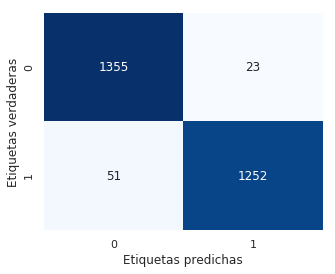

In [52]:
y_pred_log = grid_log.predict(X_test)

y_probs_log = grid_log.predict_proba(X_test) # esto lo definimos para evaluar en curvas ROC

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, cbar=False, fmt='d', cmap='Blues')

plt.ylabel('Etiquetas verdaderas')
plt.xlabel('Etiquetas predichas');

Con la matriz de confusión vemos que hay 51  falsos negativos, es decir, 51 individuos calificados como comestibles que son en realidad venenosos. Decidimos cambiamos el umbral de probabilidad a 0.3 para tratar de disminuir el numero de FN.

In [53]:
from sklearn.preprocessing import binarize

y_probs_log = grid_log.predict_proba(X_test)
y_pred_log_2 = binarize(y_probs_log, 0.3)[:,1] # esto cambia el umbral a 0.3

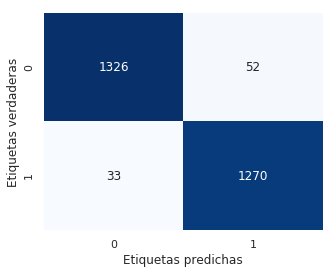

In [54]:
sns.heatmap(confusion_matrix(y_test, y_pred_log_2), annot=True, cbar=False, fmt='d', cmap='Blues')

plt.ylabel('Etiquetas verdaderas')
plt.xlabel('Etiquetas predichas');

Observamos que disminuyeron los casos de falsos negativos. Esto tiene un costo, ya que los falsos positivos aumentaron considerablemente. Pero es preferible no recolectar hongos creyendo que son venenosos aunque no lo sean que recolectar hongos creyendo que son comestibles y no lo son.

 A continuacion observamos los resultados comparando con el umbral de probabilidad a  0.3 (o sea y_pred_log vs y_pred_log_2)

In [55]:
print('Accuracy por default 0.5 =', accuracy_score(y_test, y_pred_log).round(2))
print('Accuracy con umbral de probabilidad 0.3=', accuracy_score(y_test, y_pred_log_2).round(2))
print('\nRecall por default 0.5 =', recall_score(y_test, y_pred_log))
print('Recall con umbral de probabilidad 0.3 =', recall_score(y_test, y_pred_log_2))
print('\nPrecision por default 0.5=', precision_score(y_test, y_pred_log))
print('Precision con umbral de probabilidad 0.3=', precision_score(y_test, y_pred_log_2))
print('\nf1 por default 0.5 =', f1_score(y_test,y_pred_log))
print('f1 con umbral de probabilidad 0.3 =', f1_score(y_test,y_pred_log_2))

Accuracy por default 0.5 = 0.97
Accuracy con umbral de probabilidad 0.3= 0.97

Recall por default 0.5 = 0.9608595548733692
Recall con umbral de probabilidad 0.3 = 0.9746738296239448

Precision por default 0.5= 0.9819607843137255
Precision con umbral de probabilidad 0.3= 0.9606656580937972

f1 por default 0.5 = 0.9712955779674166
f1 con umbral de probabilidad 0.3 = 0.9676190476190475


In [56]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5443, 25) (2681, 25) (5443,) (2681,)


**A continuación vamos a probar el metodo de eliminación recursiva de característica (RFECV)**
Este metodo nos permite seleccionar mediante CrossValidation la cantidad de features a retener

In [57]:
# definimos X e y
X = df.drop('clase', axis = 1)
y = df['clase']

display(X.shape, y.shape)
display(X.head())

(8124, 112)

(8124,)

,forma_sombrero_acampanada,forma_sombrero_aplanada,forma_sombrero_conica,forma_sombrero_convexa,forma_sombrero_hundida,forma_sombrero_semi-aplanada,superficie_sombrero_con escamas,superficie_sombrero_con surcos,superficie_sombrero_fibroso,superficie_sombrero_liso,color_sombrero_amarillo,color_sombrero_beige,color_sombrero_blanco,color_sombrero_canela,color_sombrero_gris,color_sombrero_marron,color_sombrero_rojo,color_sombrero_rosa,color_sombrero_verde,color_sombrero_violeta,magulladuras_Presentes,magulladuras_ausentes,olor_almendras,olor_anis,olor_humedad/rancio,olor_madera quemada,olor_ninguno,olor_pescado,olor_picante,olor_podrido,olor_vinagre,laminillas_adherentes,laminillas_libres,espacio_laminillas_amontonadas,espacio_laminillas_cercanas,tamaño_laminillas_anchas,tamaño_laminillas_estrechas,color_laminillas_amarillo,color_laminillas_beige,color_laminillas_blanco,color_laminillas_chocolate,color_laminillas_gris,color_laminillas_marron,color_laminillas_naranja,color_laminillas_negro,color_laminillas_rojo,color_laminillas_rosa,color_laminillas_verde,color_laminillas_violeta,forma_tallo_afinado,forma_tallo_agrandado,raiz_tallo_bulboso,raiz_tallo_con una raiz extensa,raiz_tallo_raiz ausente,raiz_tallo_recto,raiz_tallo_un poco hinchado,tallo_encima_anillo_escamoso,tallo_encima_anillo_fibroso,tallo_encima_anillo_liso,tallo_encima_anillo_sedoso,tallo_debajo_anillo_escamoso,tallo_debajo_anillo_fibroso,tallo_debajo_anillo_liso,tallo_debajo_anillo_sedoso,color_tallo_encima_anillo_amarillo,color_tallo_encima_anillo_beige,color_tallo_encima_anillo_blanco,color_tallo_encima_anillo_gris,color_tallo_encima_anillo_marron,color_tallo_encima_anillo_naranja,color_tallo_encima_anillo_rosa,color_tallo_debajo_anillo_amarillo,color_tallo_debajo_anillo_beige,color_tallo_debajo_anillo_blanco,color_tallo_debajo_anillo_gris,color_tallo_debajo_anillo_marron,color_tallo_debajo_anillo_naranja,color_tallo_debajo_anillo_rosa,color_velo_amarillo,color_velo_blanco,color_velo_marron,color_velo_naranja,numero_anillos_ausente,numero_anillos_dos,numero_anillos_uno,tipo_anillo_colgante,tipo_anillo_evanecente,tipo_anillo_grande,tipo_anillo_ninguno,tipo_anillo_resplandeciente,color_esporas_amarillo,color_esporas_beige,color_esporas_blanco,color_esporas_chocolate,color_esporas_marron,color_esporas_naranja,color_esporas_negro,color_esporas_verde,color_esporas_violeta,poblacion_abundante,poblacion_agrupado,poblacion_disperso,poblacion_numerosos,poblacion_solitarios,poblacion_varios,habitat_caminos,habitat_desechos,habitat_hojas,habitat_pasto,habitat_prados,habitat_sitios urbanos,habitat_troncos
0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [58]:
from sklearn import linear_model
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5443, 112) (2681, 112) (5443,) (2681,)


Numero de features optimo: 11
Features seleccionadas: ['olor_almendras', 'olor_anis', 'olor_ninguno', 'olor_podrido', 'olor_vinagre', 'tamaño_laminillas_estrechas', 'tallo_encima_anillo_sedoso', 'color_tallo_debajo_anillo_amarillo', 'color_esporas_marron', 'color_esporas_verde', 'color_esporas_violeta']


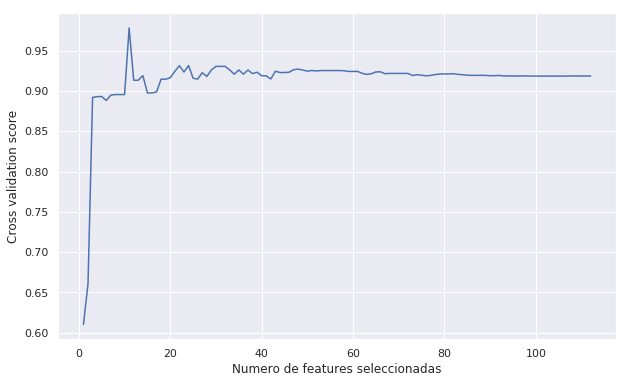

In [60]:
estimator = LogisticRegression()
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X, y)
rfecv_columns = X.columns[selector.support_]
features_seleccionados = list(X.columns[selector.support_])
print('Numero de features optimo: %d' % selector.n_features_)
print('Features seleccionadas: %s' % features_seleccionados )

#plot features vs. validation scores
plt.figure(figsize=(10,6))
plt.xlabel('Numero de features seleccionadas')
plt.ylabel('Cross validation score')
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

Vamos a graficar en un grafico de correlacion con estas features. Para esto seleccionamos las columnas relevantes y las asignamos una nueva variable

In [61]:
df_reduced_2 = df[ features_seleccionados ]

In [62]:
df_heatmap_2 = pd.concat([y_dummie, df_reduced_2], axis=1)
df_heatmap_2.head(2)

,comestible,venenoso,olor_almendras,olor_anis,olor_ninguno,olor_podrido,olor_vinagre,tamaño_laminillas_estrechas,tallo_encima_anillo_sedoso,color_tallo_debajo_anillo_amarillo,color_esporas_marron,color_esporas_verde,color_esporas_violeta
0,0,1,0,0,0,0,1,1,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,1,0,0


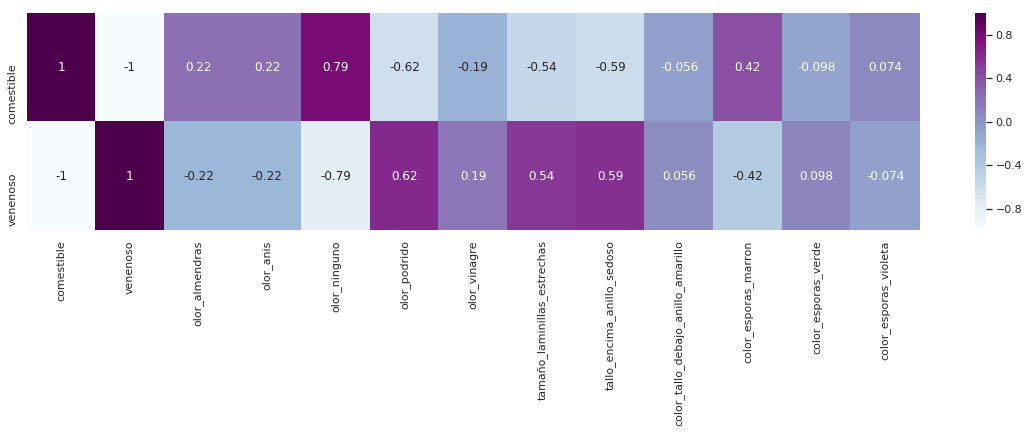

In [63]:
sns.set(rc={'figure.figsize':(20,4)})
sns.heatmap(df_heatmap_2.corr().iloc[[0,1]], annot=True, cmap='BuPu');

Comparandolo con el primer heatmap 

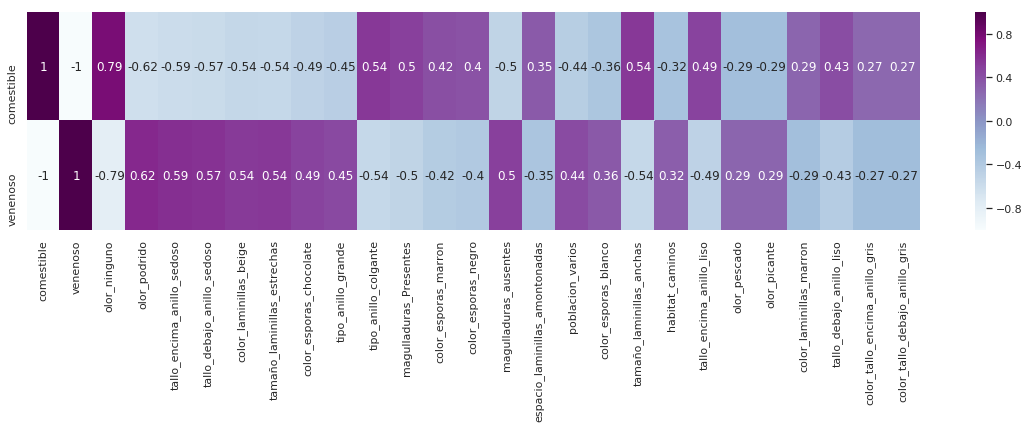

In [64]:
sns.set(rc={'figure.figsize':(20,4)})
sns.heatmap(df_heatmap_kbest.corr().iloc[[0,1]], annot=True, cmap='BuPu');

Hacemos nuevamente el train test split con la nueva matriz que la habiamos asignado X_reduced_2

In [65]:
X = df_reduced_2
y = df['clase']
display(X.shape, y.shape)

(8124, 11)

(8124,)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5443, 11) (2681, 11) (5443,) (2681,)


Ahora vamos a correr nuevamente un GridSearch con las fichurs seleccionadas

In [67]:
grid_log_rfecv = GridSearchCV(reg_log, param_grid_log, cv=5, scoring='accuracy')
grid_log_rfecv.fit(X_train, y_train)
print('Best estimator for Logistic Regresion:\n\n', grid_log_rfecv.best_estimator_)
print('\nBest Score =', grid_log_rfecv.best_score_)
print('\nBest Parameters=', grid_log_rfecv.best_params_)

Best estimator for Logistic Regresion:

 LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Best Score = 0.9990813889399228

Best Parameters= {'C': 1, 'fit_intercept': True}


Comparación con los parámetros en KBest:
Mejora el score. El C no cambia.

grid_log.best_score_  0.9750137791659012


grid_log.best_params_ {'C': 1, 'fit_intercept': True})

**Observamos las predicciones en una matriz de confusión:**

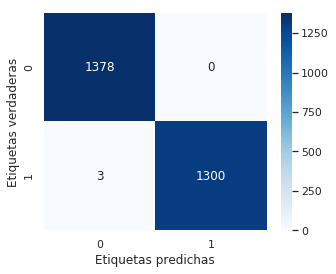

In [68]:
y_pred_log_rfecv = grid_log_rfecv.predict(X_test)

y_probs_log_rfecv= grid_log_rfecv.predict_proba(X_test) # esto lo definimos para evaluar en curvas ROC

sns.set(rc={'figure.figsize':(5,4)})
sns.heatmap(confusion_matrix(y_test, y_pred_log_rfecv), annot=True, cbar=True, fmt='d', cmap='Blues')

plt.ylabel('Etiquetas verdaderas')
plt.xlabel('Etiquetas predichas');

In [69]:
print('\nAccuracy Regresion Logistica con RFECV =', accuracy_score(y_test, y_pred_log_rfecv))
print('\nRecall Regresion Logistica con RFECV =', recall_score(y_test, y_pred_log_rfecv))
print('\nPrecision Regresion Logistica con RFECV=', precision_score(y_test, y_pred_log_rfecv))
print('\nf1 Regresion Logistica con RFECV =', f1_score(y_test,y_pred_log_rfecv))


Accuracy Regresion Logistica con RFECV = 0.9988810145468109

Recall Regresion Logistica con RFECV = 0.9976976208749041

Precision Regresion Logistica con RFECV= 1.0

f1 Regresion Logistica con RFECV = 0.9988474836726854


El método de regresión logística con RFECV nos da muy buenos resultados. Además las features seleccionadas tienen sentido al mirar el gráfico de correlación.


In [70]:
df.head(5)

,clase,forma_sombrero_acampanada,forma_sombrero_aplanada,forma_sombrero_conica,forma_sombrero_convexa,forma_sombrero_hundida,forma_sombrero_semi-aplanada,superficie_sombrero_con escamas,superficie_sombrero_con surcos,superficie_sombrero_fibroso,superficie_sombrero_liso,color_sombrero_amarillo,color_sombrero_beige,color_sombrero_blanco,color_sombrero_canela,color_sombrero_gris,color_sombrero_marron,color_sombrero_rojo,color_sombrero_rosa,color_sombrero_verde,color_sombrero_violeta,magulladuras_Presentes,magulladuras_ausentes,olor_almendras,olor_anis,olor_humedad/rancio,olor_madera quemada,olor_ninguno,olor_pescado,olor_picante,olor_podrido,olor_vinagre,laminillas_adherentes,laminillas_libres,espacio_laminillas_amontonadas,espacio_laminillas_cercanas,tamaño_laminillas_anchas,tamaño_laminillas_estrechas,color_laminillas_amarillo,color_laminillas_beige,color_laminillas_blanco,color_laminillas_chocolate,color_laminillas_gris,color_laminillas_marron,color_laminillas_naranja,color_laminillas_negro,color_laminillas_rojo,color_laminillas_rosa,color_laminillas_verde,color_laminillas_violeta,forma_tallo_afinado,forma_tallo_agrandado,raiz_tallo_bulboso,raiz_tallo_con una raiz extensa,raiz_tallo_raiz ausente,raiz_tallo_recto,raiz_tallo_un poco hinchado,tallo_encima_anillo_escamoso,tallo_encima_anillo_fibroso,tallo_encima_anillo_liso,tallo_encima_anillo_sedoso,tallo_debajo_anillo_escamoso,tallo_debajo_anillo_fibroso,tallo_debajo_anillo_liso,tallo_debajo_anillo_sedoso,color_tallo_encima_anillo_amarillo,color_tallo_encima_anillo_beige,color_tallo_encima_anillo_blanco,color_tallo_encima_anillo_gris,color_tallo_encima_anillo_marron,color_tallo_encima_anillo_naranja,color_tallo_encima_anillo_rosa,color_tallo_debajo_anillo_amarillo,color_tallo_debajo_anillo_beige,color_tallo_debajo_anillo_blanco,color_tallo_debajo_anillo_gris,color_tallo_debajo_anillo_marron,color_tallo_debajo_anillo_naranja,color_tallo_debajo_anillo_rosa,color_velo_amarillo,color_velo_blanco,color_velo_marron,color_velo_naranja,numero_anillos_ausente,numero_anillos_dos,numero_anillos_uno,tipo_anillo_colgante,tipo_anillo_evanecente,tipo_anillo_grande,tipo_anillo_ninguno,tipo_anillo_resplandeciente,color_esporas_amarillo,color_esporas_beige,color_esporas_blanco,color_esporas_chocolate,color_esporas_marron,color_esporas_naranja,color_esporas_negro,color_esporas_verde,color_esporas_violeta,poblacion_abundante,poblacion_agrupado,poblacion_disperso,poblacion_numerosos,poblacion_solitarios,poblacion_varios,habitat_caminos,habitat_desechos,habitat_hojas,habitat_pasto,habitat_prados,habitat_sitios urbanos,habitat_troncos
0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


# [Árboles de decisión](#Árboles-de-decisión)
[Volver](#Índice)

In [71]:
!pip install pydotplus
!pip install graphviz

You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


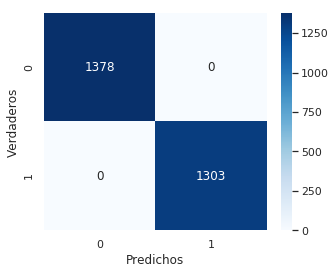

In [72]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier( random_state=68 )

X_dt = df.drop('clase', axis = 1)

y_dt = df['clase']

X_train_dt, X_test_dt, y_train_dt, y_test_dt= train_test_split(X_dt, y_dt, test_size=0.33, random_state=42)

fitted_tree = dt.fit(X_train_dt, y_train_dt)

y_pred_train_dt = dt.predict(X_train_dt)

y_pred_test_dt = dt.predict(X_test_dt)

# ELABORAMOS MATRIZ DE CONFUSION

# fig, ax = plt.subplots(figsize=(4,5)) 
sns.set(rc={'figure.figsize':(5,4)})
confusion_matrix(y_test_dt, y_pred_test_dt)
sns.heatmap(confusion_matrix(y_test_dt, y_pred_test_dt), annot=True, cmap="Blues", fmt='d')

plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

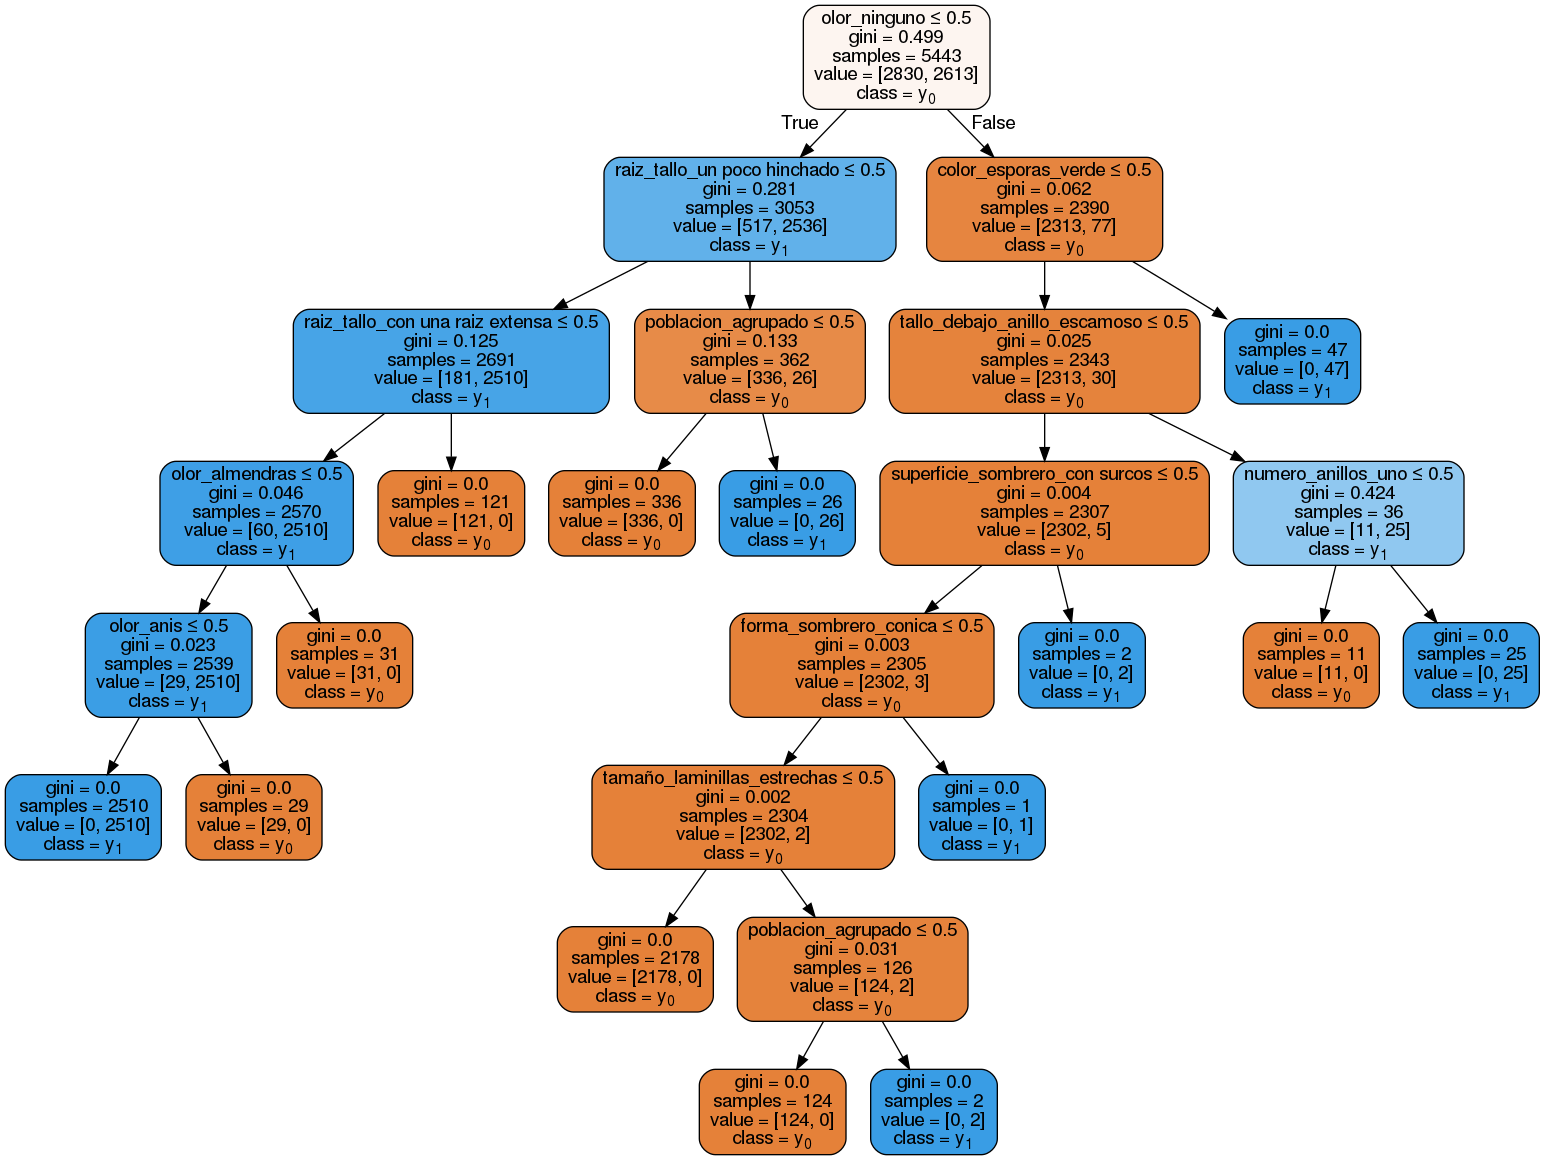

In [73]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X_dt.columns,  
                class_names=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Probamos el metodo de regresión logistica sin eliminación de features

# [Curvas ROC y área bajo la curva (AUC): Comparamos Modelos](#Curvas-ROC-y-área-bajo-la-curva-(AUC):-Comparamos-Modelos)
[Volver](#Índice)

Las curvas ROC son muy útiles si queremos visualizar cómo se mueven sensitivity y specificity ante diversos umbrales.

La curva ROC se basa en  𝑇𝑃𝑅  (tasa de verdaderos positivos) y  𝐹𝑃𝑅  (tasa de falsos negativos).

Definamos las metricas de True Positive Ratio y False Positive Rate y se las asignamos las los valores predichos vs los valores de test (observados vs esperados).
El método roc_curve toma como parámetros dos valores: los valores observados del target y un array de probabilidades (NO recibe las predicciones de la clase).
Devuelve tres elementos en forma de arrays: la tasa de falsos positivos ( 𝐹𝑃𝑅 ), la tasa de verdaderos positivos ( 𝑇𝑃𝑅 ) y los umbrales

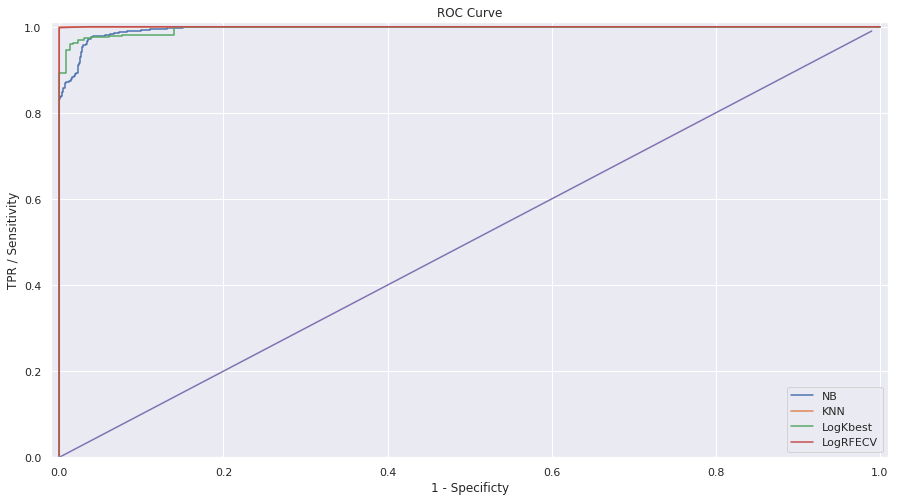

In [74]:
from sklearn.metrics import roc_curve

fpr_nb,tpr_nb,thr_nb = roc_curve(y_test, y_probs_NB[:,1])
fpr_knn, tpr_knn, thr_knn = roc_curve(y_test, y_probs_knn[:,1])
fpr_log,tpr_log,thr_log = roc_curve(y_test, y_probs_log[:,1])
fpr_log_rfecv,tpr_log_rfecv, thr_log_rfecv = roc_curve(y_test, y_probs_log_rfecv[:,1])


plt.figure(figsize=(15,8))
plt.axis([-0.01, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(fpr_nb,tpr_nb)
plt.plot(fpr_knn, tpr_knn)
plt.plot(fpr_log,tpr_log)
plt.plot(fpr_log_rfecv,tpr_log_rfecv)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.legend(['NB','KNN','LogKbest','LogRFECV'])
plt.show() 

El resultado de las curvas ROC se condice con las métricas de evaluación

Despues de todos los modelos evaluados concluimos que la relacion entre las features y la variable es bastante simple y altamente lineal. Recordemos que es un dataset hipotetico.

# [Prueba de Regresión Logística sin aplicar los métodos de Feature Selection (KBest y RFECV)](#Prueba-de-Regresión-Logística-sin-aplicar-los-métodos-de-Feature-Selection-(KBest-y-RFECV))
[Volver](#Índice)

In [75]:
# definimos X e y
X = df.drop('clase', axis = 1)
y = df['clase']
display(X.shape, y.shape)
display(X.head())

(8124, 112)

(8124,)

,forma_sombrero_acampanada,forma_sombrero_aplanada,forma_sombrero_conica,forma_sombrero_convexa,forma_sombrero_hundida,forma_sombrero_semi-aplanada,superficie_sombrero_con escamas,superficie_sombrero_con surcos,superficie_sombrero_fibroso,superficie_sombrero_liso,color_sombrero_amarillo,color_sombrero_beige,color_sombrero_blanco,color_sombrero_canela,color_sombrero_gris,color_sombrero_marron,color_sombrero_rojo,color_sombrero_rosa,color_sombrero_verde,color_sombrero_violeta,magulladuras_Presentes,magulladuras_ausentes,olor_almendras,olor_anis,olor_humedad/rancio,olor_madera quemada,olor_ninguno,olor_pescado,olor_picante,olor_podrido,olor_vinagre,laminillas_adherentes,laminillas_libres,espacio_laminillas_amontonadas,espacio_laminillas_cercanas,tamaño_laminillas_anchas,tamaño_laminillas_estrechas,color_laminillas_amarillo,color_laminillas_beige,color_laminillas_blanco,color_laminillas_chocolate,color_laminillas_gris,color_laminillas_marron,color_laminillas_naranja,color_laminillas_negro,color_laminillas_rojo,color_laminillas_rosa,color_laminillas_verde,color_laminillas_violeta,forma_tallo_afinado,forma_tallo_agrandado,raiz_tallo_bulboso,raiz_tallo_con una raiz extensa,raiz_tallo_raiz ausente,raiz_tallo_recto,raiz_tallo_un poco hinchado,tallo_encima_anillo_escamoso,tallo_encima_anillo_fibroso,tallo_encima_anillo_liso,tallo_encima_anillo_sedoso,tallo_debajo_anillo_escamoso,tallo_debajo_anillo_fibroso,tallo_debajo_anillo_liso,tallo_debajo_anillo_sedoso,color_tallo_encima_anillo_amarillo,color_tallo_encima_anillo_beige,color_tallo_encima_anillo_blanco,color_tallo_encima_anillo_gris,color_tallo_encima_anillo_marron,color_tallo_encima_anillo_naranja,color_tallo_encima_anillo_rosa,color_tallo_debajo_anillo_amarillo,color_tallo_debajo_anillo_beige,color_tallo_debajo_anillo_blanco,color_tallo_debajo_anillo_gris,color_tallo_debajo_anillo_marron,color_tallo_debajo_anillo_naranja,color_tallo_debajo_anillo_rosa,color_velo_amarillo,color_velo_blanco,color_velo_marron,color_velo_naranja,numero_anillos_ausente,numero_anillos_dos,numero_anillos_uno,tipo_anillo_colgante,tipo_anillo_evanecente,tipo_anillo_grande,tipo_anillo_ninguno,tipo_anillo_resplandeciente,color_esporas_amarillo,color_esporas_beige,color_esporas_blanco,color_esporas_chocolate,color_esporas_marron,color_esporas_naranja,color_esporas_negro,color_esporas_verde,color_esporas_violeta,poblacion_abundante,poblacion_agrupado,poblacion_disperso,poblacion_numerosos,poblacion_solitarios,poblacion_varios,habitat_caminos,habitat_desechos,habitat_hojas,habitat_pasto,habitat_prados,habitat_sitios urbanos,habitat_troncos
0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5443, 112) (2681, 112) (5443,) (2681,)


In [77]:
c_range =[0.01, 0.1, 1, 10, 100]
intercept = [True, False]
reg_log = LogisticRegression() # instanciamos la clase con todos los param por default
param_grid_log = dict(C=c_range, fit_intercept=intercept)  # aca lo transform en un diccionario
print(param_grid_log)

{'C': [0.01, 0.1, 1, 10, 100], 'fit_intercept': [True, False]}


In [78]:
grid_log = GridSearchCV(reg_log, param_grid_log, cv=5, scoring='accuracy')
grid_log.fit(X_train, y_train)
grid_log.best_estimator_, grid_log.best_score_, grid_log.best_params_

(LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False), 1.0, {'C': 10, 'fit_intercept': True})

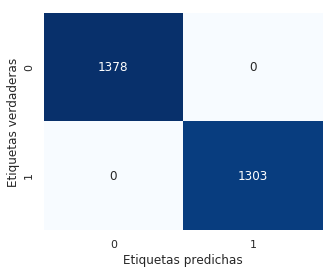

In [79]:
y_pred_log = grid_log.predict(X_test)

y_probs_log = grid_log.predict_proba(X_test) # esto lo definimos para evaluar en curvas ROC

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, cbar=False, fmt='d', cmap='Blues')

plt.ylabel('Etiquetas verdaderas')
plt.xlabel('Etiquetas predichas');

# [KNN sin aplicar KBest](#KNN-sin-aplicar-KBest)
[Volver](#Índice)

In [80]:
from sklearn.neighbors import DistanceMetric
k_range = list(range(1, 3))
weight_options = ['uniform', 'distance']
metrics = ['euclidean', 'jaccard','hamming']
knn = KNeighborsClassifier() # instanciamos la clase con todos los param por default
param_grid = dict(n_neighbors=k_range, weights=weight_options, metric=metrics)  
print(param_grid)

{'n_neighbors': [1, 2], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'jaccard', 'hamming']}


In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train) 

In [ ]:
print("Escogemos los mejores parametros:\n", grid.best_params_)

In [ ]:
y_pred_knn = grid.predict(X_test)

y_probs_knn = grid.predict_proba(X_test)  # esto lo definimos para evaluar en curvas ROC

sns.set(rc={'figure.figsize':(5,4)})
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, cbar=True, fmt='d', cmap='Blues')
plt.ylabel('Etiquetas verdaderas')
plt.xlabel('Etiquetas predichas');

De todas maneras, sin hacer una selección de features tenemos una matriz de confusión perfecta, con 0 falsos positivos y 0 falsos negativos.

# [Conclusión final](#Conclusión-final)

[Volver](#Índice)

Para este dataset que todas las features fueron categóricas no es necesario realizar feature selection ya que al volver a plantear los modelos KNN y Logistic generalizaron óptimamente sin Falsos Negativos que serían fatales en caso de que el hongo sea venenoso.